In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Initialiser un dictionnaire pour stocker les chemins de fichiers
file_dict = {}

# Parcourir les répertoires et fichiers
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # Obtenir le nom du fichier sans l'extension
        name_without_ext = os.path.splitext(filename)[0]
        
        if name_without_ext != "sample_submission":
           # Ajouter l'entrée dans le dictionnaire avec le nom du fichier sans extension
           file_dict[name_without_ext[8:]] = os.path.join(dirname, filename)
        else:
            file_dict[name_without_ext[7:]] = os.path.join(dirname, filename)

# Afficher le dictionnaire résultant
print(file_dict)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

{'training_solutions': '/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json', 'evaluation_solutions': '/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json', 'evaluation_challenges': '/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json', 'submission': '/kaggle/input/arc-prize-2024/sample_submission.json', 'training_challenges': '/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json', 'test_challenges': '/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json'}


In [3]:
import json
import os

# Correcting the tuple assignments
file_paths_train = (file_dict['training_challenges'], file_dict['evaluation_challenges'])
file_paths_test = (file_dict['training_solutions'], file_dict['evaluation_solutions'])

Test = []

# Iterating over train files
for train_path in file_paths_train:
    if os.path.exists(train_path):
        with open(train_path, 'r') as file:
            data_tr = json.load(file)
    
    # Iterating over test files
    for test_path in file_paths_test:
        if os.path.exists(test_path):
            with open(test_path, 'r') as file:
                data_te = json.load(file)
            
            # Matching keys between train and test data
            for k, v_tr in data_tr.items():
                if k in data_te:  # Check if the key exists in the test data and k in '00576224'
                    v_te = data_te[k]  # Get the corresponding value from test data
                    
                    # Append relevant information to Test
                    Test.append({'input': v_tr['test'][0]['input'], 'output': v_te[0]})

print(Test[:2])


[{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]], 'output': [[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]}, {'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 

In [4]:
print(len(Test))

800


In [4]:
import json
import os

file_paths = [file_dict['training_challenges'], file_dict['evaluation_challenges'], file_dict['test_challenges']]

# Initialized a list for each dataset
Train = []
Eval = []
Test_c = []

# Boucle à travers chaque chemin de fichier
for i, f in enumerate(file_paths):
    if os.path.exists(f):
        # Open and load JSON data
        with open(f, 'r') as file:
            data = json.load(file)
        
        # If Train is empty, populate Train, otherwise populate Eval
        for key, value in data.items():
            if i == 0 and 'train' in value:  # first file -> Train
                if key == "11852cab":
                    print(value['test'])
                Train.extend(value['train'])
            elif i == 1 and 'train' in value:  # second file -> Eval
                if key == "11852cab":
                    print("ok")
                Eval.extend(value['train'])
            elif i == 2 and 'train' in value:  # third file -> Test_c
                if key == "11852cab":
                    print(value['test'])
                Test_c.extend(value['train'])
    else:
        print(f"File not found at {f}")

# Affichage des résultats pour vérification (décommenter si nécessaire)
# print("Train:", Train)
# print("Eval:", Eval)
# print("Test_c:", Test_c)


[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 4, 0, 1, 0, 0, 0, 0], [0, 0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}]
[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 4, 0, 1, 0, 0, 0, 0], [0, 0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}]


In [5]:
print(len(Test_c))  
print(len(Train)) 
print(len(Eval)) 

323
1302
1363


### create Data_ = {}
### extens all others Dictionaries in Data_ dict
### create for loop to get all values in a list

In [6]:
Data = []
Data.extend(Train[:])
Data.extend(Eval[:])
Data.extend(Test[:])
Data.extend(Test_c[:]) 

In [7]:
print(Train[:6]) 

[{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]}, {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]], 'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]}, {'input': [[0, 0, 0], [0, 0, 2], [2, 0, 2]], 'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 2], [2, 0, 2, 0, 0, 0, 2, 0, 2]]}, {'input': [[6, 6, 0], [6, 0, 0], [0, 6, 6]

In [8]:
print(len(Data))

3788


### Split Data_ dict in train, eval, test and stored it in a list called Data

In [9]:
train_set = Data[:int(0.7*len(Data))]
eval_set = Data[int(0.7*len(Data)):int(0.9*len(Data))]
test_set = Data[int(0.9*len(Data)):]

print(train_set[:1])
print(eval_set[:1])
print(test_set[:1])

[{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]}]
[{'input': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1

In [131]:
# Eval.extend(Test[600:700][0])

/tmp/ipykernel_33/2584181399.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': skew(flat_values)


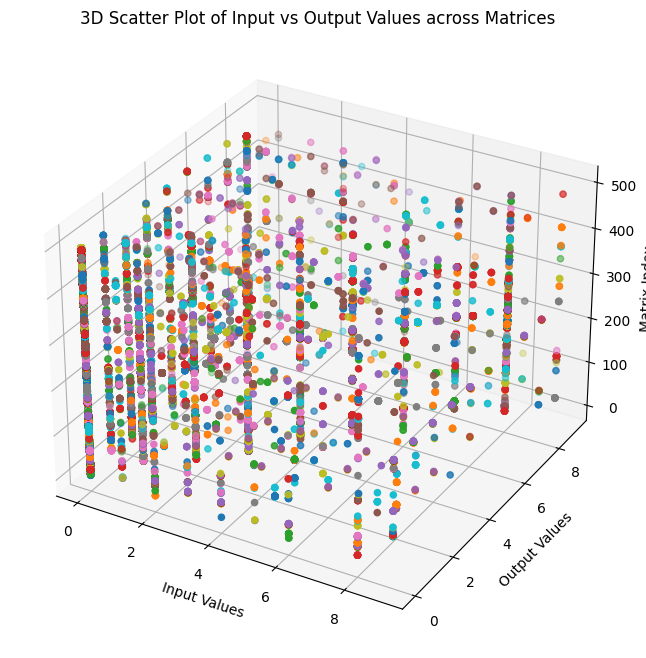

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, skew
import pandas as pd

# Simulating `test` data structure for the purpose of this demonstration
dataset = train_set[1:500]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

def analyze_matrix(matrix):
    matrix = np.array(matrix)
    flat_values = matrix.flatten()
    analysis = {
        'mean': np.mean(flat_values),
        'median': np.median(flat_values),
        'std_dev': np.std(flat_values),
        'variance': np.var(flat_values),
        'percentage_zeros': np.sum(flat_values == 0) / len(flat_values) * 100,
        'skewness': skew(flat_values)
    }
    return analysis

# Analyse des matrices input et output
input_analysis = [analyze_matrix(matrix) for matrix in matrices_input]
output_analysis = [analyze_matrix(matrix) for matrix in matrices_output]

# Affichage des résultats d'analyse
# print("Input Analysis:")
# print(pd.DataFrame(input_analysis))
# print("\nOutput Analysis:")
# print(pd.DataFrame(output_analysis))

# Préparer les données pour la visualisation 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()
    
    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]
    
    # Créer une série d'indices pour l'axe Z (numéro de la matrice)
    z_values = np.full(min_length, i + 1)
    
    # Scatter plot en 3D pour chaque matrice
    ax.scatter(input_flat, output_flat, z_values, label=f'Matrix {i+1}')

# Configurations du plot 3D
ax.set_xlabel('Input Values')
ax.set_ylabel('Output Values')
ax.set_zlabel('Matrix Index')
ax.set_title('3D Scatter Plot of Input vs Output Values across Matrices')
# plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

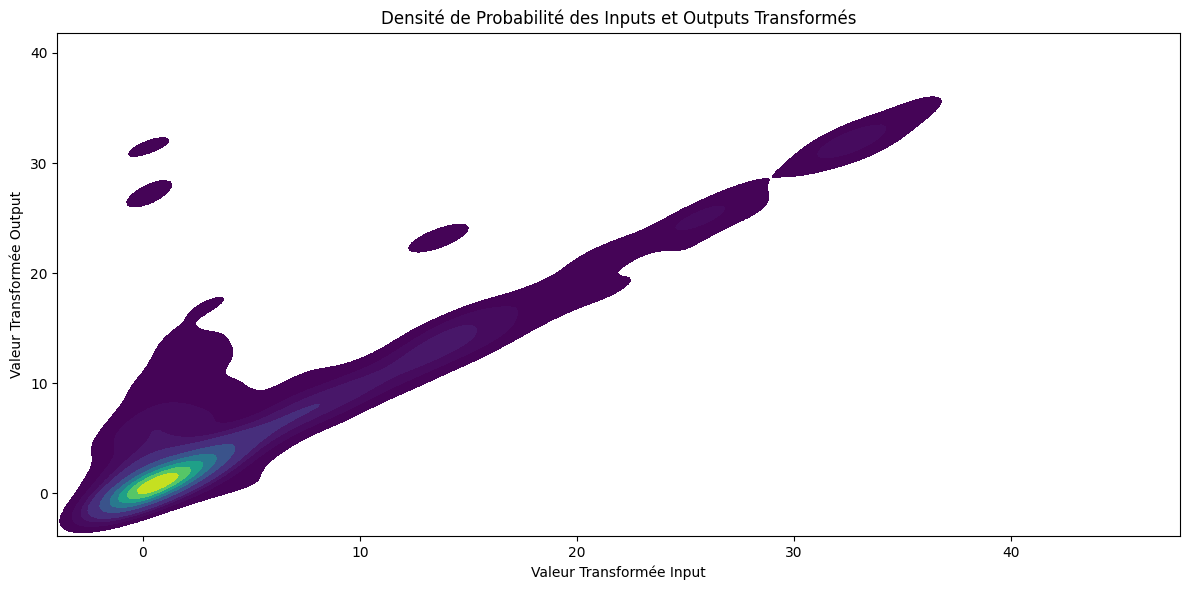

In [133]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:500]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Initialiser les listes pour stocker les valeurs transformées
all_input_results = []
all_output_results = []

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour les calculs
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Calcul des paramètres statistiques
    input_mean = np.mean(input_flat)
    input_std = np.std(input_flat)
    output_mean = np.mean(output_flat)
    output_std = np.std(output_flat)

    # Appliquer la formule : std^2 * dot_product + mean
    input_result = input_flat * input_std + input_mean
    output_result = output_flat * output_std + output_mean

    # Stocker les résultats pour toutes les paires
    all_input_results.extend(input_result)
    all_output_results.extend(output_result)

# Création de DataFrame pour faciliter le traçage avec Seaborn
import pandas as pd
df = pd.DataFrame({
    'Input Result': all_input_results,
    'Output Result': all_output_results
})

# Tracer les courbes de densité de probabilité
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Input Result', y='Output Result', cmap='viridis', fill=True, thresh=0.1)

# Ajout de titres et d'étiquettes
plt.title("Densité de Probabilité des Inputs et Outputs Transformés")
plt.xlabel("Valeur Transformée Input")
plt.ylabel("Valeur Transformée Output")

plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


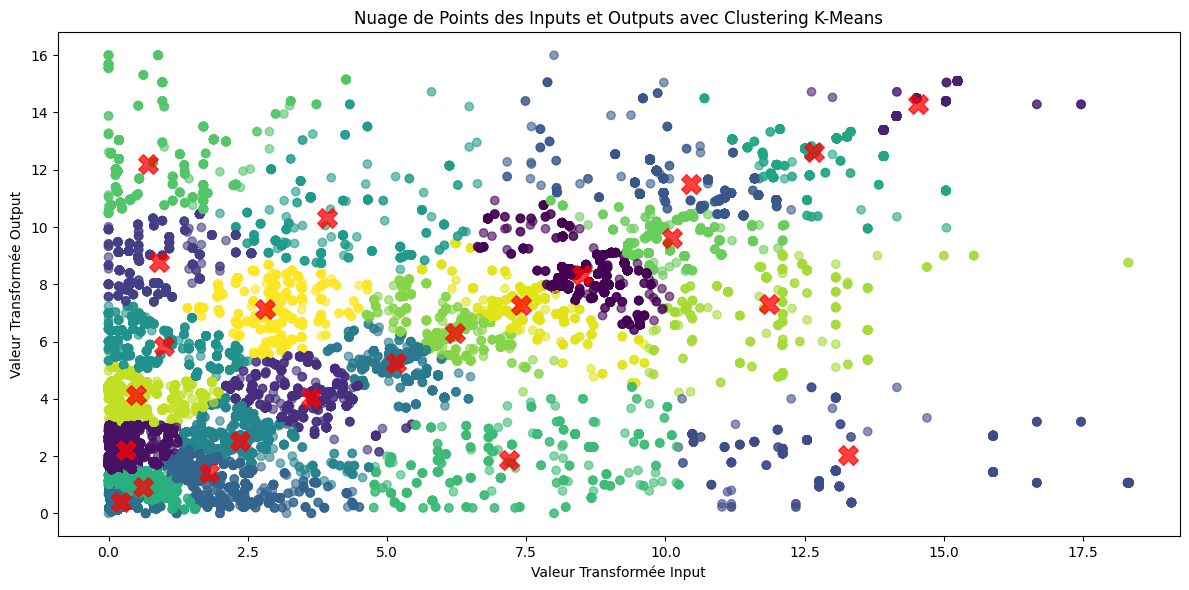

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:500]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Stocker les résultats transformés pour k-means
input_results = []
output_results = []

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour les calculs
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Calcul des paramètres statistiques
    input_mean = np.mean(input_flat)
    input_std = np.std(input_flat)
    output_mean = np.mean(output_flat)
    output_std = np.std(output_flat)

    # Appliquer la formule : std * dot_product + mean
    input_result = (input_flat**0.5) * input_std + input_mean
    output_result = (output_flat**0.5) * output_std + output_mean

    # Stocker les résultats transformés pour k-means
    input_results.extend(input_result)
    output_results.extend(output_result)

# Convertir les résultats en un tableau numpy pour k-means
X = np.array(list(zip(input_results, output_results)))

# Appliquer l'algorithme k-means
kmeans = KMeans(n_clusters=23, random_state=0).fit(X)
labels = kmeans.labels_

# Créer le nuage de points en coloriant selon les clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)

# Tracer les centres des clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

# Ajout de titres et de légendes
plt.title("Nuage de Points des Inputs et Outputs avec Clustering K-Means")
plt.xlabel("Valeur Transformée Input")
plt.ylabel("Valeur Transformée Output")

plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


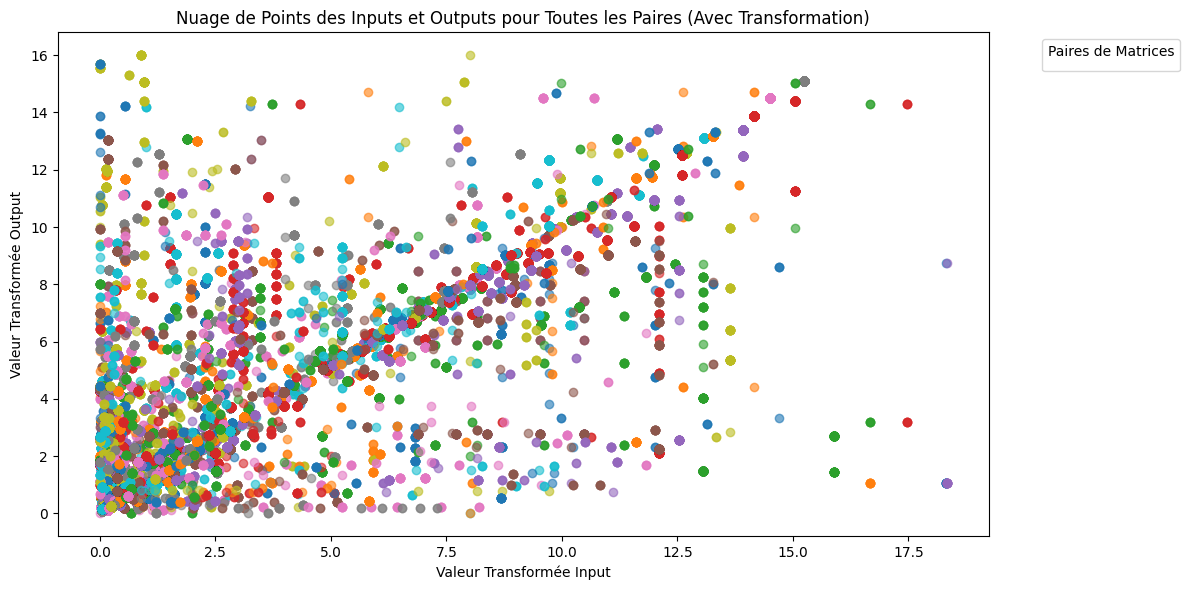

In [135]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:400]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour les calculs
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Calcul des paramètres statistiques
    input_mean = np.mean(input_flat)
    input_std = np.std(input_flat)
    output_mean = np.mean(output_flat)
    output_std = np.std(output_flat)

    # Appliquer la formule : std^2 * dot_product + mean
    input_result = (input_flat**0.5) * input_std + input_mean
    output_result = (output_flat**0.5) * output_std + output_mean

    # Création du nuage de points pour chaque paire
    plt.scatter(input_result, output_result, alpha=0.6) #, label=f"Pair {i+1}")

# Ajout de titres et de légendes
plt.title("Nuage de Points des Inputs et Outputs pour Toutes les Paires (Avec Transformation)")
plt.xlabel("Valeur Transformée Input")
plt.ylabel("Valeur Transformée Output")

# Utilisation de plt.legend() avec un paramètre pour gérer les nombreuses légendes
plt.legend(title="Paires de Matrices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


/tmp/ipykernel_33/882442436.py:48: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(input_result, output_result)[0, 1]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


<Figure size 1400x800 with 0 Axes>

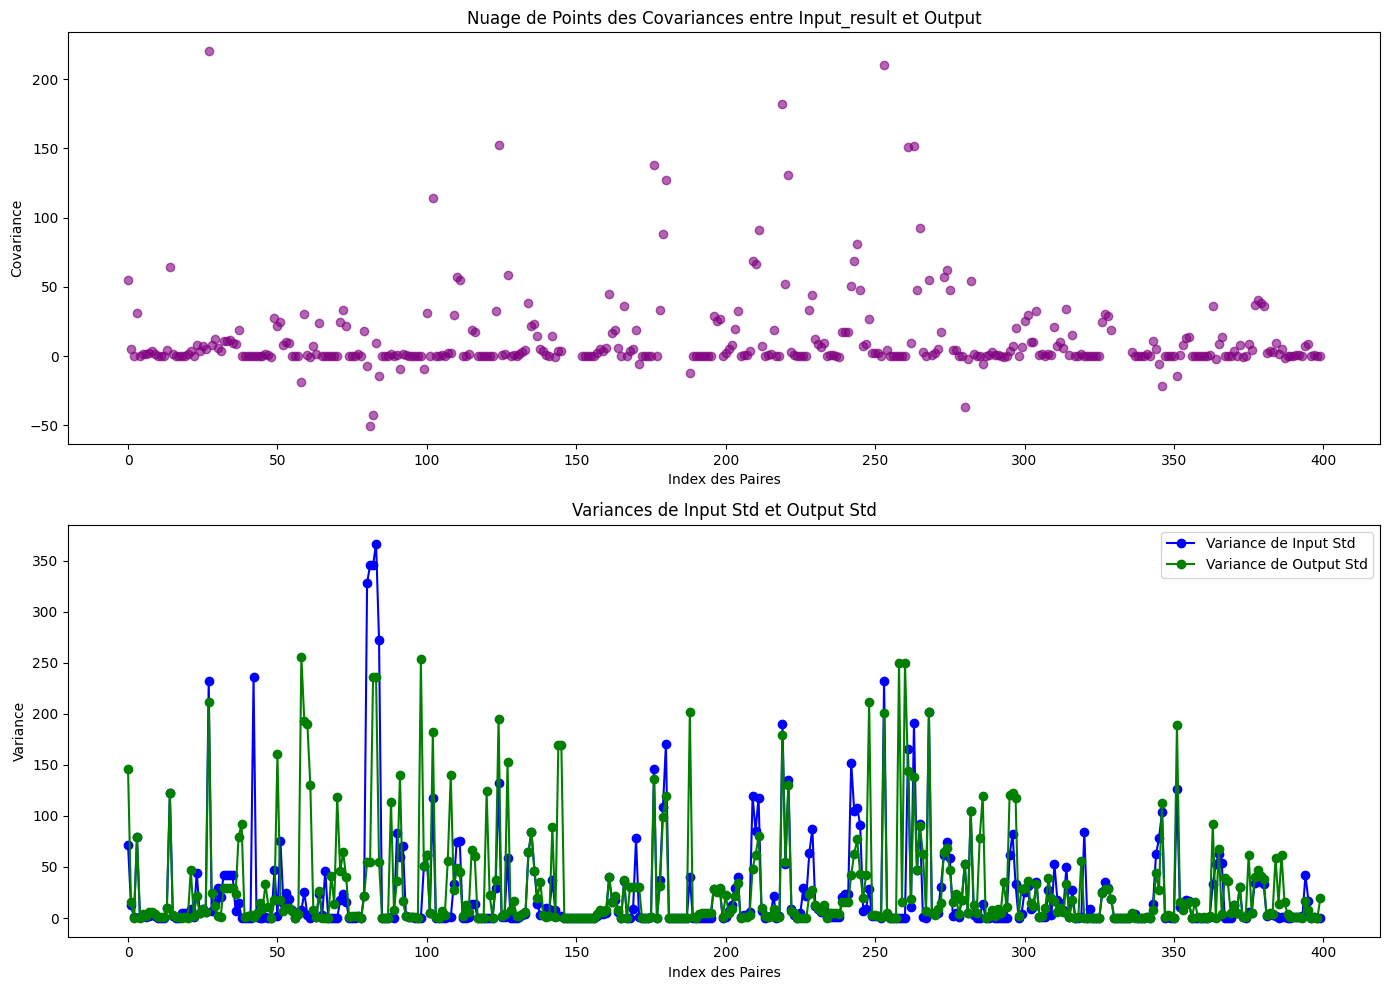

In [136]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(14, 8))

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:400]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

covariances = []
variances_input = []
variances_output = []

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour les calculs
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Calcul des paramètres statistiques
    input_mean = np.mean(input_flat)
    input_std = np.std(input_flat)
    output_mean = np.mean(output_flat)
    output_std = np.std(output_flat)

    # Appliquer la formule : std^2 * dot_product + mean
    input_result = input_flat * input_std + input_mean
    output_result = output_flat * output_std + output_mean

    # Calcul de la covariance entre input_result et output_result
    covariance = np.cov(input_result, output_result)[0, 1]
    covariances.append(covariance)

    # Stocker les variances de input_std et output_std
#     variances_input.append(input_std ** 2)
#     variances_output.append(output_std ** 2)

    # Calcul des variances de input_result et output_result
    input_variance = np.var(input_result)
    output_variance = np.var(output_result)

    variances_input.append(input_variance)
    variances_output.append(output_variance)

# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Tracer le nuage de points des covariances
ax1.scatter(range(len(covariances)), covariances, alpha=0.6, color='purple')
ax1.set_title("Nuage de Points des Covariances entre Input_result et Output")
ax1.set_xlabel("Index des Paires")
ax1.set_ylabel("Covariance")

# Tracer les variances de input_std et output_std
ax2.plot(range(len(variances_input)), variances_input, linestyle='-', marker='o', color='blue', label='Variance de Input Std')
ax2.plot(range(len(variances_output)), variances_output, linestyle='-', marker='o', color='green', label='Variance de Output Std')
ax2.set_title("Variances de Input Std et Output Std")
ax2.set_xlabel("Index des Paires")
ax2.set_ylabel("Variance")
ax2.legend()

plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

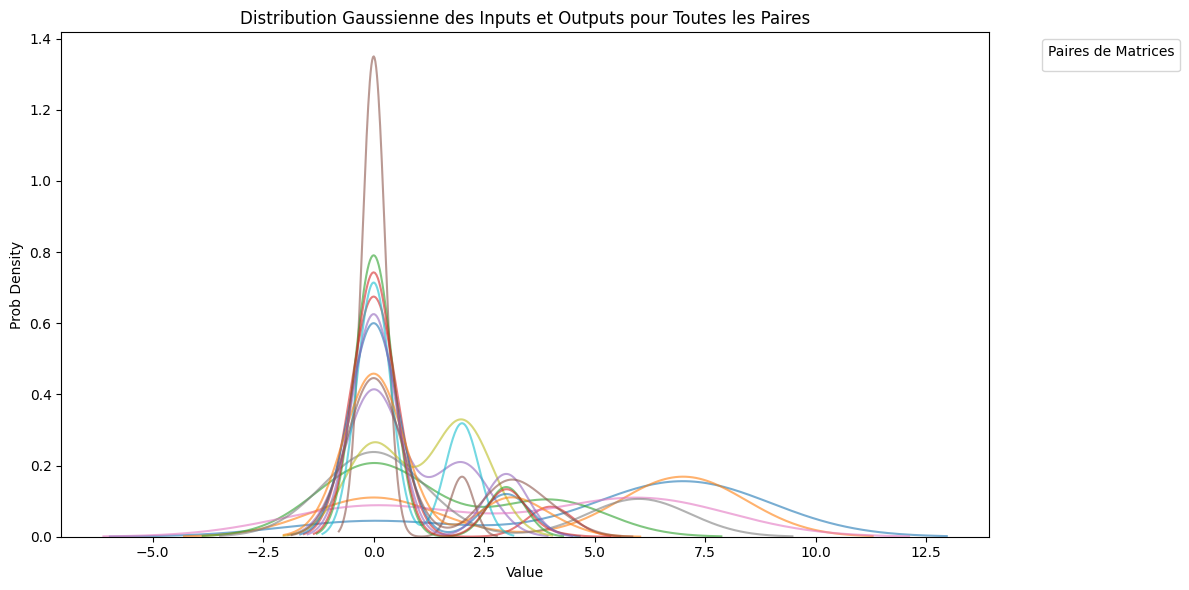

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))

# Simulating `test` data structure for the purpose of this demonstration
dataset = train_set[:8]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()
  
  # Calcul des paramètres statistiques
    input_mean = np.mean(input_flat)
    input_std = np.std(input_flat)
    output_mean = np.mean(output_flat)
    output_std = np.std(output_flat)
  
  # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
#     input_flat = input_flat[:min_length]
#     output_flat = output_flat[:min_length]
    input_flat = input_flat[:len(input_flat)]
    output_flat = output_flat[:len(output_flat)]

  # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

  # Création des courbes de densité de probabilité pour chaque paire
    sns.kdeplot(input_flat, fill=False, alpha=0.6) #, label=f"Input Pair {input_mean}", fill=False, alpha=0.6)
    sns.kdeplot(output_flat, fill=False, alpha=0.6) #, label=f"Output Pair {output_mean}", fill=False, alpha=0.6)

# Ajout de titres et de légendes
plt.title("Distribution Gaussienne des Inputs et Outputs pour Toutes les Paires")
plt.xlabel("Value")
plt.ylabel("Prob Density")

# Utilisation de plt.legend() avec un paramètre pour gérer les nombreuses légendes
plt.legend(title="Paires de Matrices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Pour éviter les coupures de légende
plt.show()


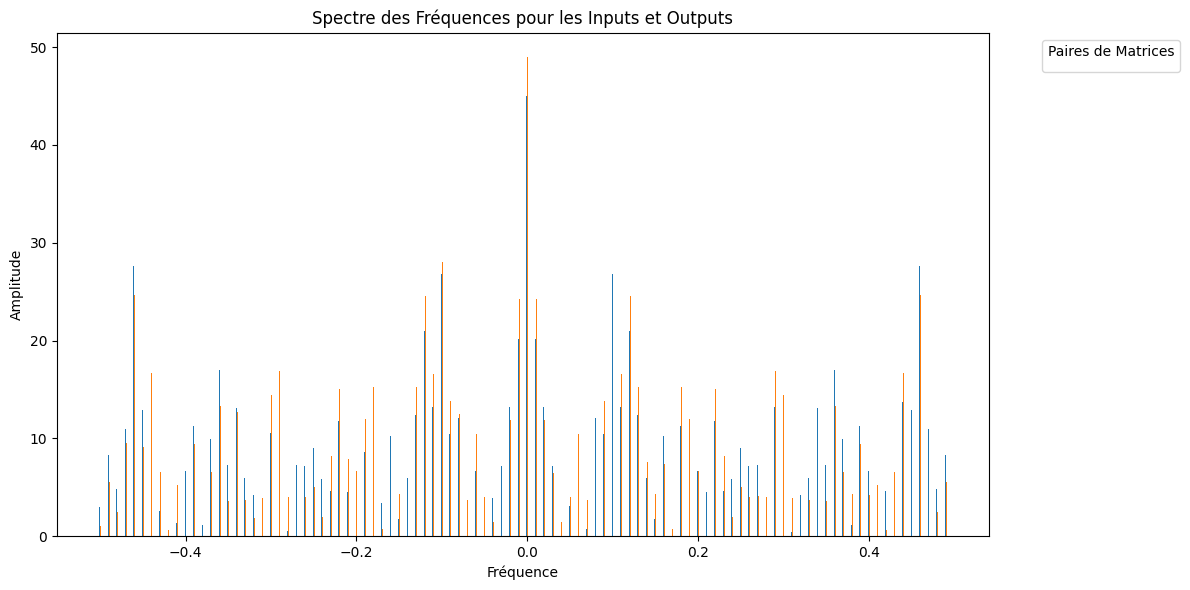

In [155]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simulating `test` data structure for the purpose of this demonstration
dataset = train_set[6:7]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
#     input_flat = input_flat[:min_length]
#     output_flat = output_flat[:min_length]
    input_flat = input_flat[:len(input_flat)]
    output_flat = output_flat[:len(output_flat)]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Tracer le spectre des fréquences (amplitude en fonction des fréquences) en barres
    width = 0.001  # Largeur des barres
    plt.bar(freqs - width/2, np.abs(input_fft), width=width) #, label=f"Input Pair {i+1}")
    plt.bar(freqs + width/2, np.abs(output_fft), width=width) #, label=f"Output Pair {i+1}")

# Ajout de titres et de légendes
plt.title("Spectre des Fréquences pour les Inputs et Outputs")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")

# Utilisation de plt.legend() pour distinguer les différentes paires
plt.legend(title="Paires de Matrices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


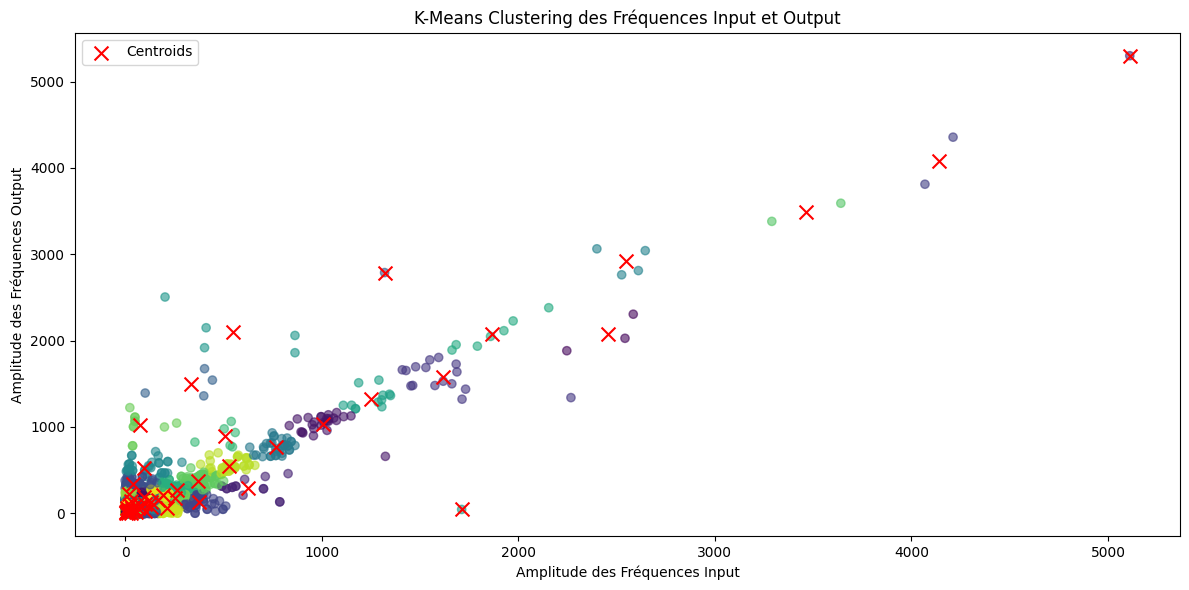

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:1500]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Liste pour stocker les données de fréquences pour k-means
freq_data = []

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Calcul des paramètres statistiques                                # deleted
    input_mean = np.mean(input_flat)
    input_std = np.std(input_flat)
    output_mean = np.mean(output_flat)
    output_std = np.std(output_flat)
    
    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.abs(np.fft.fft(input_flat))
    output_fft = np.abs(np.fft.fft(output_flat))

    # Appliquer la formule : std^2 * dot_product + mean                   # deleted
    input_result = (input_flat**0.5) * input_fft + input_mean
    output_result = (output_flat**0.5) * output_fft + output_mean


    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Ajouter les données de fréquence pour k-means (concatenation input et output)
    for j in range(len(freqs)):
        freq_data.append([input_fft[j], output_fft[j]])

# Convertir freq_data en array pour k-means
freq_data = np.array(freq_data)

# Appliquer le modèle k-means
kmeans = KMeans(n_clusters=50, random_state=0).fit(freq_data)
labels = kmeans.labels_

# Tracer le nuage de points en fonction des clusters
plt.scatter(freq_data[:, 0], freq_data[:, 1], c=labels, cmap='viridis', alpha=0.6)

# Ajouter les centres des clusters au graphique
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='x', label='Centroids')

# Ajout de titres et de légendes
plt.title("K-Means Clustering des Fréquences Input et Output")
plt.xlabel("Amplitude des Fréquences Input")
plt.ylabel("Amplitude des Fréquences Output")

# Afficher la légende
plt.legend()
plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


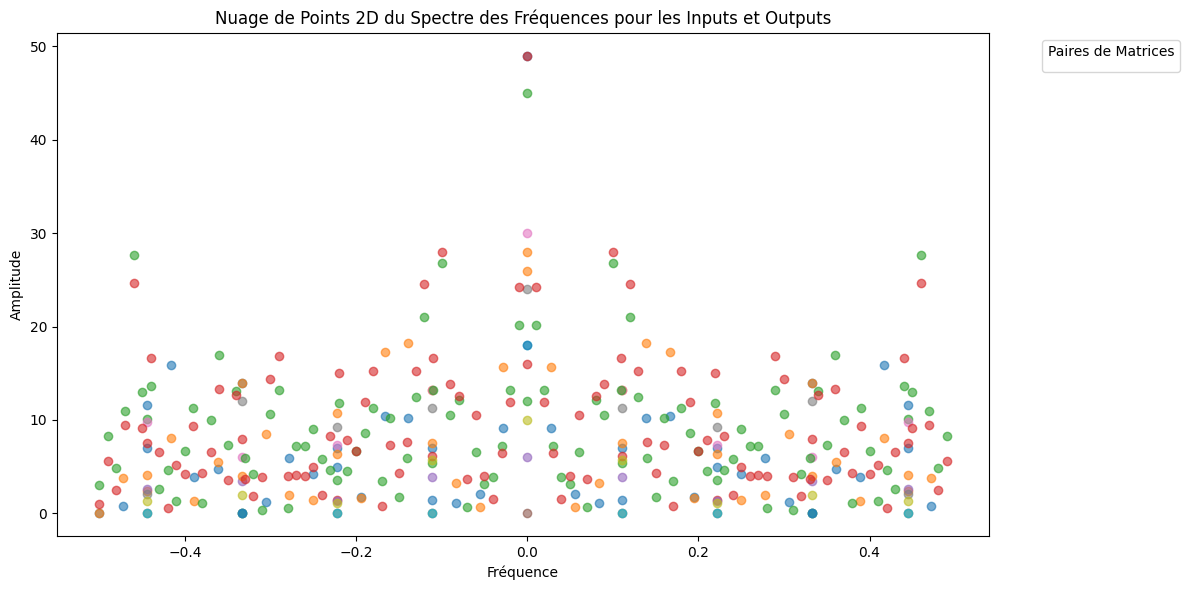

In [140]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simulating `train_set` data structure for the purpose of this demonstration
dataset = train_set[:7]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Calculer la covariance entre les séries de fréquences
    covariance = np.cov(np.abs(input_fft), np.abs(output_fft))

    # Afficher les points en fonction de la fréquence et de l'amplitude
    plt.scatter(freqs, np.abs(input_fft), alpha=0.6) #, label=f"Input Pair {i+1}")
    plt.scatter(freqs, np.abs(output_fft), alpha=0.6) #, label=f"Output Pair {i+1}")

# Ajout de titres et de légendes
plt.title("Nuage de Points 2D du Spectre des Fréquences pour les Inputs et Outputs")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")

# Utilisation de plt.legend() pour distinguer les différentes paires
plt.legend(title="Paires de Matrices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


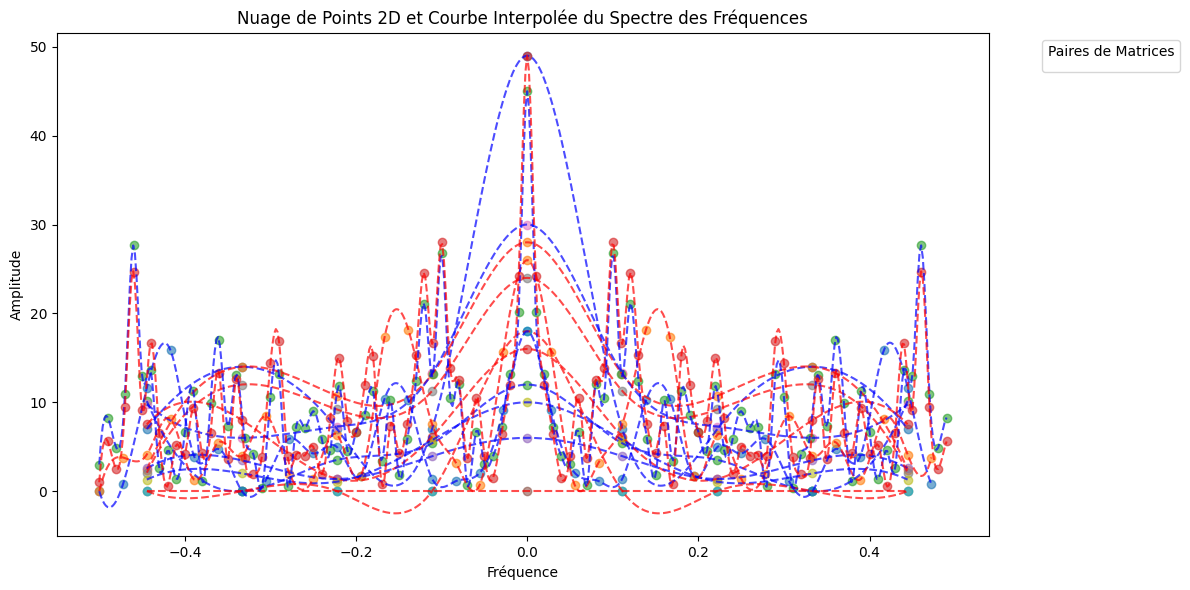

In [141]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simulating `train_set` data structure for the purpose of this demonstration
dataset = train_set[:7]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Afficher les points en fonction de la fréquence et de l'amplitude
    plt.scatter(freqs, np.abs(input_fft), alpha=0.6)# , label=f"Input Pair {i+1}")
    plt.scatter(freqs, np.abs(output_fft), alpha=0.6)#, label=f"Output Pair {i+1}")

    # Interpolation pour les inputs et outputs
    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    # Créer des points de fréquence pour une courbe plus lisse
    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    # Tracer les courbes d'interpolation
    plt.plot(smooth_freqs, input_interp(smooth_freqs), linestyle='--', color='blue', alpha=0.7)#, label=f"Interpolated Input Pair {i+1}")
    plt.plot(smooth_freqs, output_interp(smooth_freqs), linestyle='--', color='red', alpha=0.7)#, label=f"Interpolated Output Pair {i+1}")

# Ajout de titres et de légendes
plt.title("Nuage de Points 2D et Courbe Interpolée du Spectre des Fréquences")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")

# Utilisation de plt.legend() pour distinguer les différentes paires
plt.legend(title="Paires de Matrices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


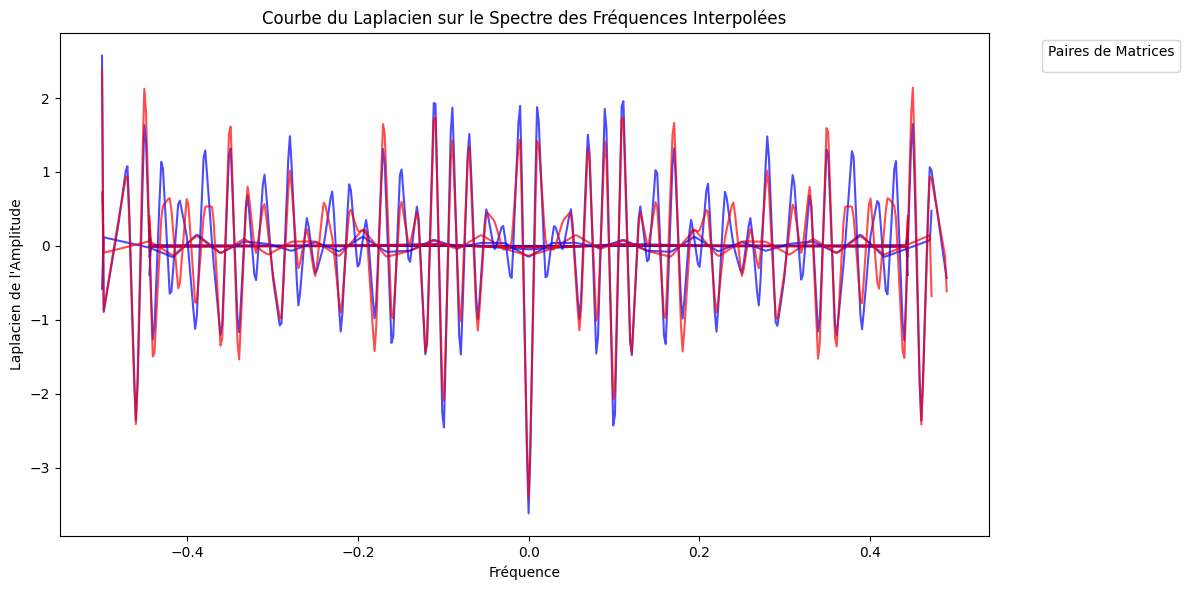

In [142]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import laplace

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simuler la structure de `train_set` pour la démonstration
dataset = train_set[:7]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Interpolation pour les inputs et outputs
    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    # Créer des points de fréquence pour une courbe plus lisse
    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    # Calculer le laplacien sur les données interpolées
    input_laplacian = laplace(input_interp(smooth_freqs))
    output_laplacian = laplace(output_interp(smooth_freqs))

    # Tracer les courbes du laplacien pour les inputs et outputs
    plt.plot(smooth_freqs, input_laplacian, linestyle='-', color='blue', alpha=0.7) #, label=f"Laplacian Input Pair {i+1}")
    plt.plot(smooth_freqs, output_laplacian, linestyle='-', color='red', alpha=0.7) #, label=f"Laplacian Output Pair {i+1}")

# Ajout de titres et de légendes
plt.title("Courbe du Laplacien sur le Spectre des Fréquences Interpolées")
plt.xlabel("Fréquence")
plt.ylabel("Laplacien de l'Amplitude")

# Utilisation de plt.legend() pour distinguer les différentes paires
plt.legend(title="Paires de Matrices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


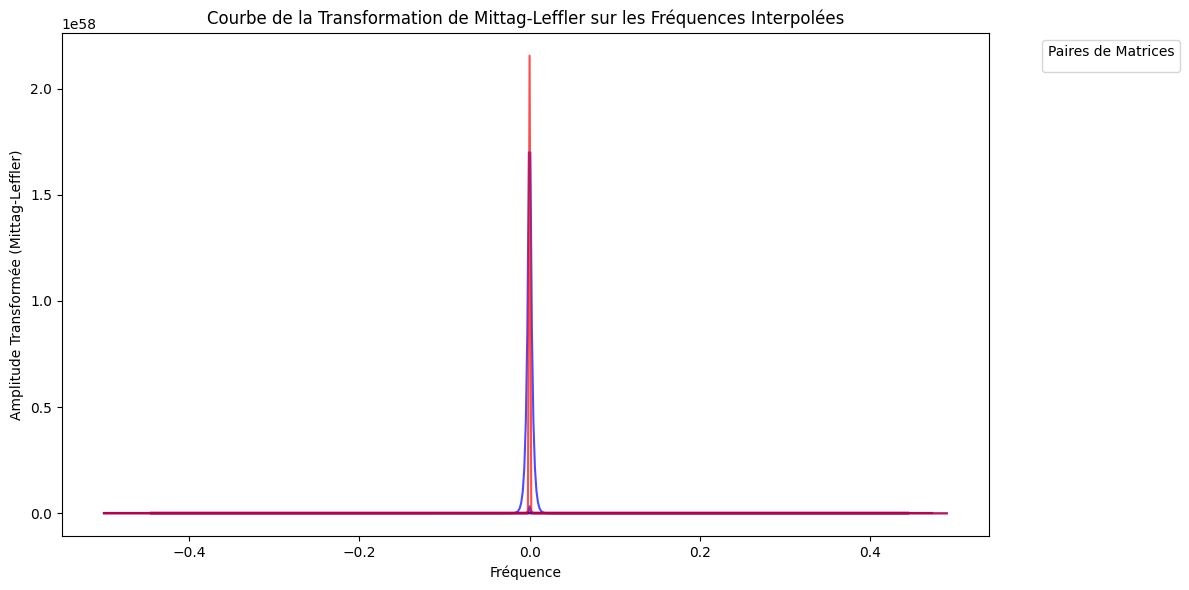

In [143]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import gamma

def mittag_leffler(alpha, beta, z, n_terms=50):
    """
    Calcule la fonction de Mittag-Leffler E_{alpha,beta}(z) en utilisant une série tronquée.
    """
    summation = 0
    for k in range(n_terms):
        term = (z**k) / gamma(alpha*k + beta)
        if np.isinf(term) or np.isnan(term):
            break  # Stop if the term overflows or is not a number
        summation += term
    return summation

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simulating `train_set` data structure for the purpose of this demonstration
dataset = train_set[:7]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Interpolation pour les inputs et outputs
    try:
        input_interp = interp1d(freqs, np.abs(input_fft), kind='linear', fill_value="extrapolate")
        output_interp = interp1d(freqs, np.abs(output_fft), kind='linear', fill_value="extrapolate")
    except ValueError as e:
        print(f"Error in interpolation for pair {i}: {e}")
        continue

    # Créer des points de fréquence pour une courbe plus lisse
    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    # Calculer la transformation de Mittag-Leffler sur les fréquences interpolées
    alpha, beta = 0.5, 1
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    # Tracer les courbes de Mittag-Leffler
    plt.plot(smooth_freqs, input_ml, linestyle='-', color='blue', alpha=0.7)
    plt.plot(smooth_freqs, output_ml, linestyle='-', color='red', alpha=0.7)

# Ajout de titres et de légendes
plt.title("Courbe de la Transformation de Mittag-Leffler sur les Fréquences Interpolées")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude Transformée (Mittag-Leffler)")

# Utilisation de plt.legend() pour distinguer les différentes paires
plt.legend(title="Paires de Matrices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()

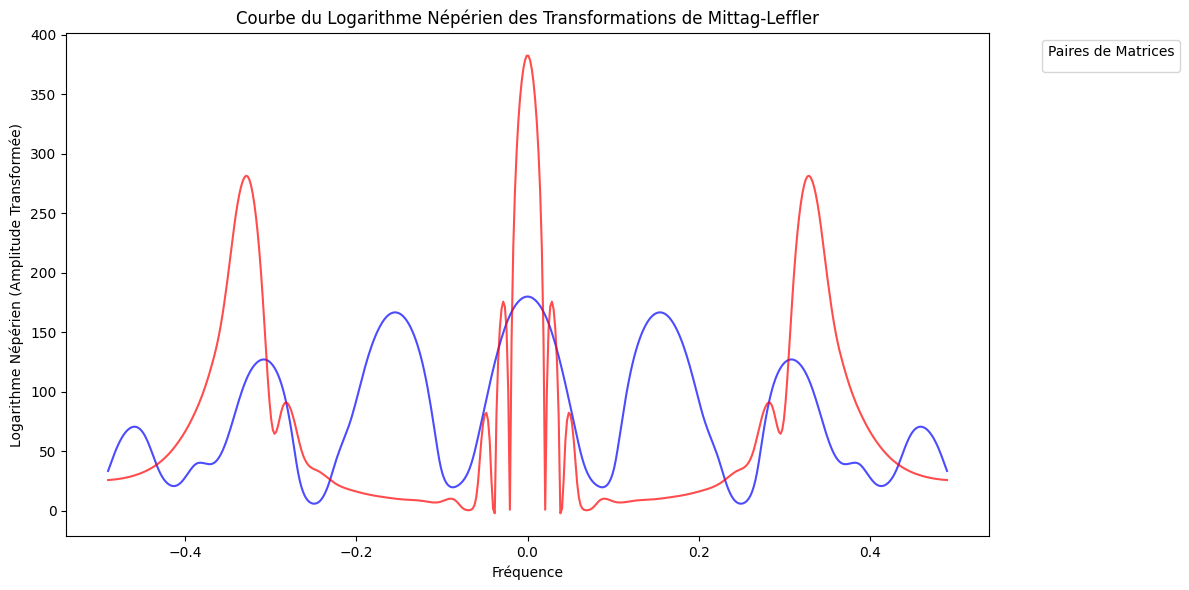

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import ln, gamma

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

def mittag_leffler(alpha, beta, z, n_terms=100):
    """
    Calcule la fonction de Mittag-Leffler E_{alpha,beta}(z) en utilisant une série tronquée.

    Parameters:
    alpha : float
        Le paramètre α de la fonction de Mittag-Leffler.
    beta : float
        Le paramètre β de la fonction de Mittag-Leffler.
    z : complex
        Le point d'évaluation z (peut être un nombre réel ou complexe).
    n_terms : int, optional
        Le nombre de termes à utiliser dans la série (plus il est élevé, plus la précision est grande).

    Returns:
    float
        La valeur de la fonction de Mittag-Leffler en z.
    """
    summation = 0
    for k in range(n_terms):
        summation += (z**k) / gamma(alpha*k + beta)
    return float(summation)  # Convertir en float pour compatibilité avec NumPy

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[21:22]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
#     input_flat = input_flat[:len(input_flat)]
#     output_flat = output_flat[:len(output_flat)]
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Interpolation pour les inputs et outputs
    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    # Créer des points de fréquence pour une courbe plus lisse
    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    # Calculer la transformation de Mittag-Leffler sur les fréquences interpolées
    alpha, beta = 0.5, 1  # Exemple de paramètres pour la fonction Mittag-Leffler
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])


    # Appliquer le logarithme népérien sur les sorties de Mittag-Leffler                  # deleted or not
    input_log_ml = np.array([ln(val).real for val in input_ml], dtype=float)
    output_log_ml = np.array([ln(val).real for val in output_ml], dtype=float)

    # Appliquer le logarithme népérien sur les sorties de Mittag-Leffler
#     input_log_ml = np.log(input_ml)  # Utiliser np.log pour le logarithme népérien
#     output_log_ml = np.log(output_ml)  # Utiliser np.log pour le logarithme népérien

    # Tracer les courbes du logarithme des sorties de Mittag-Leffler
    plt.plot(smooth_freqs, input_log_ml, linestyle='-', color='blue', alpha=0.7) #, label=f"Log(Mittag-Leffler) Input Pair {i+1}")
    plt.plot(smooth_freqs, output_log_ml, linestyle='-', color='red', alpha=0.7) #, label=f"Log(Mittag-Leffler) Output Pair {i+1}")

# Ajout de titres et de légendes
plt.title("Courbe du Logarithme Népérien des Transformations de Mittag-Leffler")
plt.xlabel("Fréquence")
plt.ylabel("Logarithme Népérien (Amplitude Transformée)")

# Utilisation de plt.legend() pour distinguer les différentes paires
plt.legend(title="Paires de Matrices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


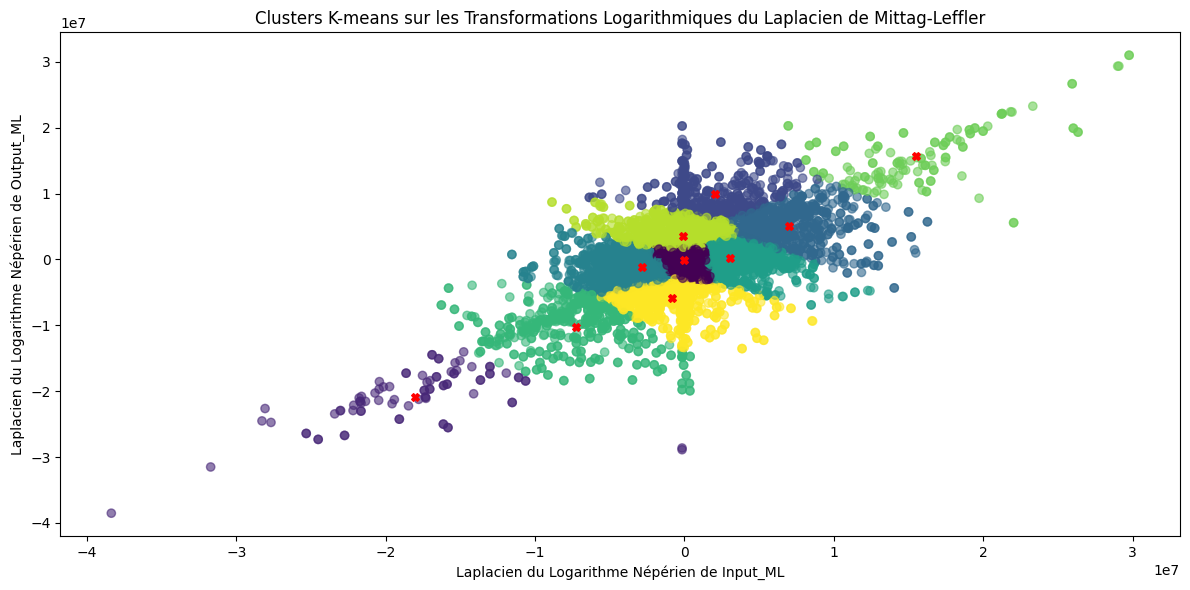

In [149]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma  # Pour la fonction gamma
from sklearn.cluster import KMeans  # Importer le modèle K-means

plt.figure(figsize=(12, 6))

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))  # Conversion explicite en float
        if np.isinf(term):  # Stopper si on rencontre un infini
            break
        summation += term
    return summation

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:100]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

all_input_log_ml = []
all_output_log_ml = []

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))

    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    alpha, beta = 0.5, 1  
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    input_ml = np.array(input_ml, dtype=float)
    output_ml = np.array(output_ml, dtype=float)

    # Filtrer les valeurs négatives ou nulles avant de prendre le logarithme
    input_ml = np.where(input_ml > 0, input_ml, np.nan)
    output_ml = np.where(output_ml > 0, output_ml, np.nan)

    input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
    output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

    # Calcul du Laplacien (approximé par la dérivée seconde)
    laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
    laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

    # Stocker les résultats pour tous les échantillons
    all_input_log_ml.extend(laplacian_input_ml)
    all_output_log_ml.extend(laplacian_output_ml)

# Convertir les listes en arrays NumPy pour les utiliser dans K-means
all_input_log_ml = np.array(all_input_log_ml).reshape(-1, 1)
all_output_log_ml = np.array(all_output_log_ml).reshape(-1, 1)

# Appliquer le modèle K-means
data_points = np.hstack((all_input_log_ml, all_output_log_ml))
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)
labels = kmeans.labels_

# Tracer le nuage de points des clusters
plt.scatter(all_input_log_ml, all_output_log_ml, c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', marker='X')

# Ajout de titres et de légendes
plt.title("Clusters K-means sur les Transformations Logarithmiques du Laplacien de Mittag-Leffler")
plt.xlabel("Laplacien du Logarithme Népérien de Input_ML")
plt.ylabel("Laplacien du Logarithme Népérien de Output_ML")

plt.tight_layout()
plt.show()


/tmp/ipykernel_33/1446045507.py:31: RuntimeWarning: invalid value encountered in sqrt
  radius = np.sqrt(1 - squared_norms)  # Radius for the hemisphere
/tmp/ipykernel_33/1446045507.py:126: RuntimeWarning: invalid value encountered in sqrt
  ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], np.sqrt(1 - np.sum(kmeans.cluster_centers_**2, axis=1)), s=30, c='red', marker='X')


<Figure size 1200x600 with 0 Axes>

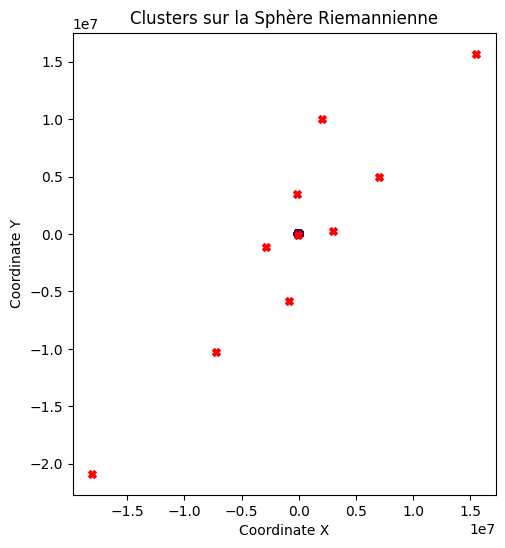

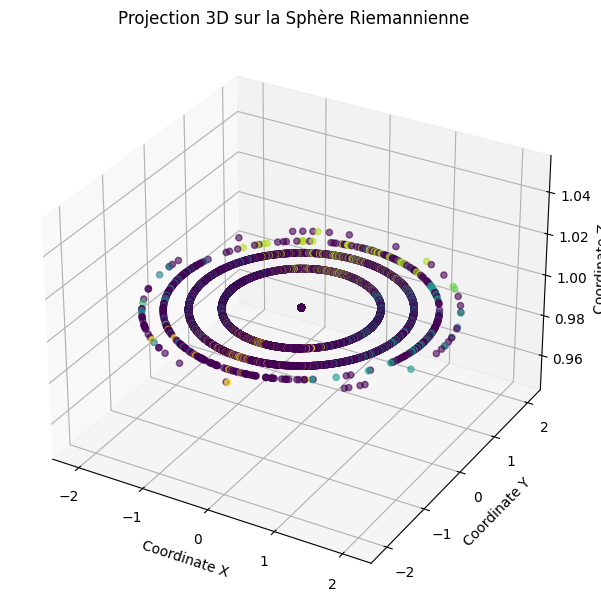

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(12, 6))

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))
        if np.isinf(term):
            break
        summation += term
    return summation

def project_to_riemannian_half_sphere(points):
    """
    Projects points to a Riemannian half-sphere.
    Assumes points are in Euclidean space and maps them to the surface of the hemisphere.
    """
    # Normalize to fit on the unit sphere
    norms = np.linalg.norm(points, axis=1, keepdims=True)
    normalized_points = points / np.maximum(norms, 1e-10)  # Avoid division by zero

    # Map to the hemisphere
    squared_norms = np.sum(normalized_points**2, axis=1)
    radius = np.sqrt(1 - squared_norms)  # Radius for the hemisphere

    # Create an array for the projected points
    projected_points = np.hstack([
        normalized_points * radius[:, np.newaxis],  # x and y coordinates
        radius.reshape(-1, 1)  # z coordinate
    ])

    return projected_points

# Simulate the `train_set` structure for this demonstration
dataset = train_set[:100]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

all_input_log_ml = []
all_output_log_ml = []

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))

    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    alpha, beta = 0.5, 1  
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    input_ml = np.array(input_ml, dtype=float)
    output_ml = np.array(output_ml, dtype=float)

    input_ml = np.where(input_ml > 0, input_ml, np.nan)
    output_ml = np.where(output_ml > 0, output_ml, np.nan)

    input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
    output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

    laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
    laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

    all_input_log_ml.extend(laplacian_input_ml)
    all_output_log_ml.extend(laplacian_output_ml)

# Convert to NumPy arrays for K-means
all_input_log_ml = np.array(all_input_log_ml).reshape(-1, 1)
all_output_log_ml = np.array(all_output_log_ml).reshape(-1, 1)

# Concatenate data points
data_points = np.hstack((all_input_log_ml, all_output_log_ml))

# Apply K-means clustering
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0).fit(data_points)  # Explicitly set n_init
labels = kmeans.labels_

# Project to the Riemannian half-sphere
projected_points = project_to_riemannian_half_sphere(data_points)

# Plot the clusters on the Riemannian half-sphere
plt.figure(figsize=(12, 6))

# Plotting the 2D projection of the Riemannian half-sphere
plt.subplot(1, 2, 1)
plt.scatter(projected_points[:, 0], projected_points[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', marker='X')
plt.title("Clusters sur la Sphère Riemannienne")
plt.xlabel("Coordinate X")
plt.ylabel("Coordinate Y")

# Plotting the 3D projection of the Riemannian half-sphere
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(122, projection='3d')

# Compute the z coordinate for the hemisphere
z = np.sqrt(1 - np.sum(projected_points[:, :2]**2, axis=1))

ax.scatter(projected_points[:, 0], projected_points[:, 1], z, c=labels, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], np.sqrt(1 - np.sum(kmeans.cluster_centers_**2, axis=1)), s=30, c='red', marker='X')

ax.set_title("Projection 3D sur la Sphère Riemannienne")
ax.set_xlabel("Coordinate X")
ax.set_ylabel("Coordinate Y")
ax.set_zlabel("Coordinate Z")

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

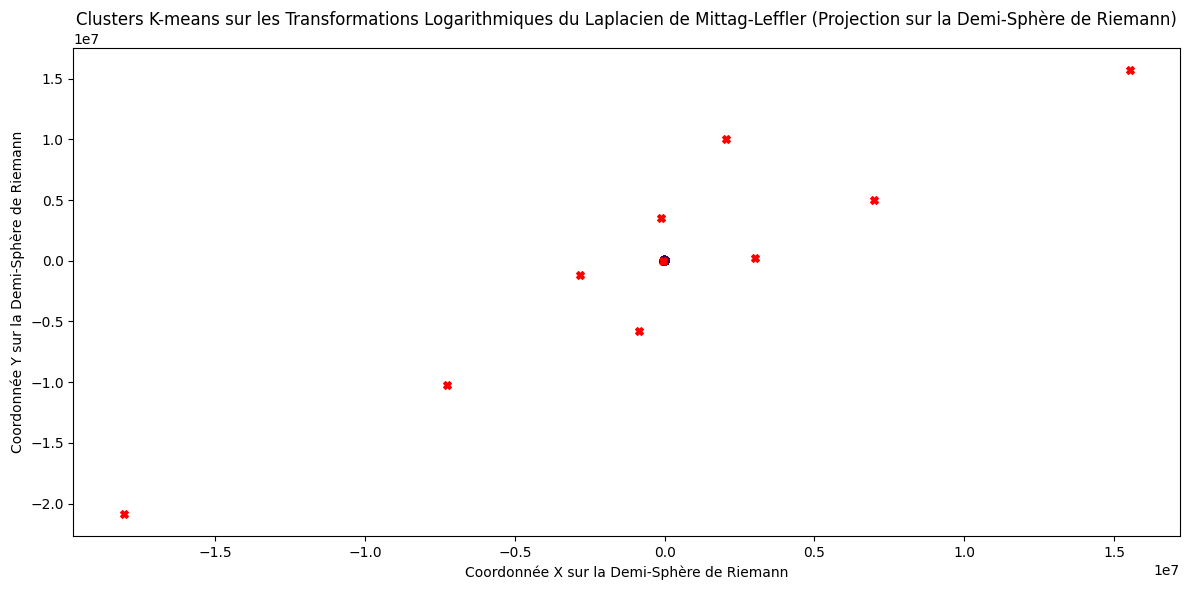

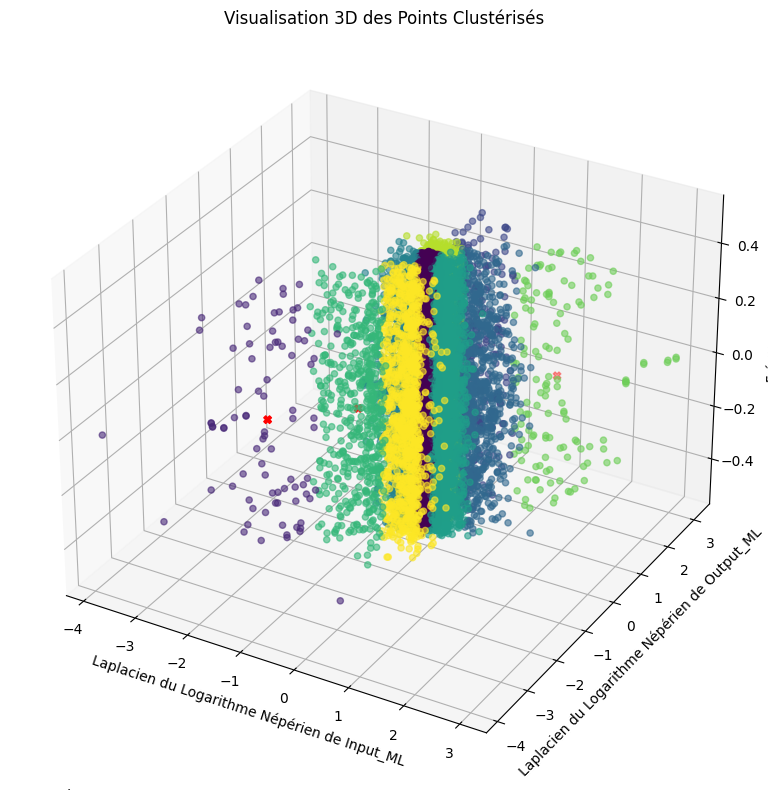

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma  # Pour la fonction gamma
from sklearn.cluster import KMeans  # Importer le modèle K-means
from mpl_toolkits.mplot3d import Axes3D  # Importer les outils pour les graphiques 3D

plt.figure(figsize=(12, 6))

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))  # Conversion explicite en float
        if np.isinf(term):  # Stopper si on rencontre un infini
            break
        summation += term
    return summation

def project_to_riemannian_half_sphere(x, y):
    norm = np.sqrt(x**2 + y**2)
    norm = np.where(norm == 0, 1, norm)
    x_normalized = x / norm
    y_normalized = y / norm
    return x_normalized, y_normalized

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:100]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

all_input_log_ml = []
all_output_log_ml = []
all_freqs = []

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))

    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    alpha, beta = 0.5, 1  
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    input_ml = np.array(input_ml, dtype=float)
    output_ml = np.array(output_ml, dtype=float)

    input_ml = np.where(input_ml > 0, input_ml, np.nan)
    output_ml = np.where(output_ml > 0, output_ml, np.nan)

    input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
    output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

    laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
    laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

    all_input_log_ml.extend(laplacian_input_ml)
    all_output_log_ml.extend(laplacian_output_ml)
    all_freqs.extend(smooth_freqs[:len(laplacian_input_ml)])

# Convertir les listes en arrays NumPy pour les utiliser dans K-means
all_input_log_ml = np.array(all_input_log_ml).reshape(-1, 1)
all_output_log_ml = np.array(all_output_log_ml).reshape(-1, 1)
all_freqs = np.array(all_freqs).reshape(-1, 1)

# Appliquer le modèle K-means
data_points = np.hstack((all_input_log_ml, all_output_log_ml))
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)
labels = kmeans.labels_

# Projection des points sur la demi-sphère de Riemann
x_normalized, y_normalized = project_to_riemannian_half_sphere(data_points[:, 0], data_points[:, 1])

# Tracer le nuage de points des clusters sur la demi-sphère de Riemann
plt.figure(figsize=(12, 6))
plt.scatter(x_normalized, y_normalized, c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', marker='X')
plt.title("Clusters K-means sur les Transformations Logarithmiques du Laplacien de Mittag-Leffler (Projection sur la Demi-Sphère de Riemann)")
plt.xlabel("Coordonnée X sur la Demi-Sphère de Riemann")
plt.ylabel("Coordonnée Y sur la Demi-Sphère de Riemann")
plt.tight_layout()
plt.show()

# Tracer les données en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Points 3D avec fréquence
ax.scatter(all_input_log_ml, all_output_log_ml, all_freqs, c=labels, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], np.zeros_like(kmeans.cluster_centers_[:, 0]), s=30, c='red', marker='X')

# Ajouter des étiquettes et un titre
ax.set_title("Visualisation 3D des Points Clustérisés")
ax.set_xlabel("Laplacien du Logarithme Népérien de Input_ML")
ax.set_ylabel("Laplacien du Logarithme Népérien de Output_ML")
ax.set_zlabel("Fréquence")

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


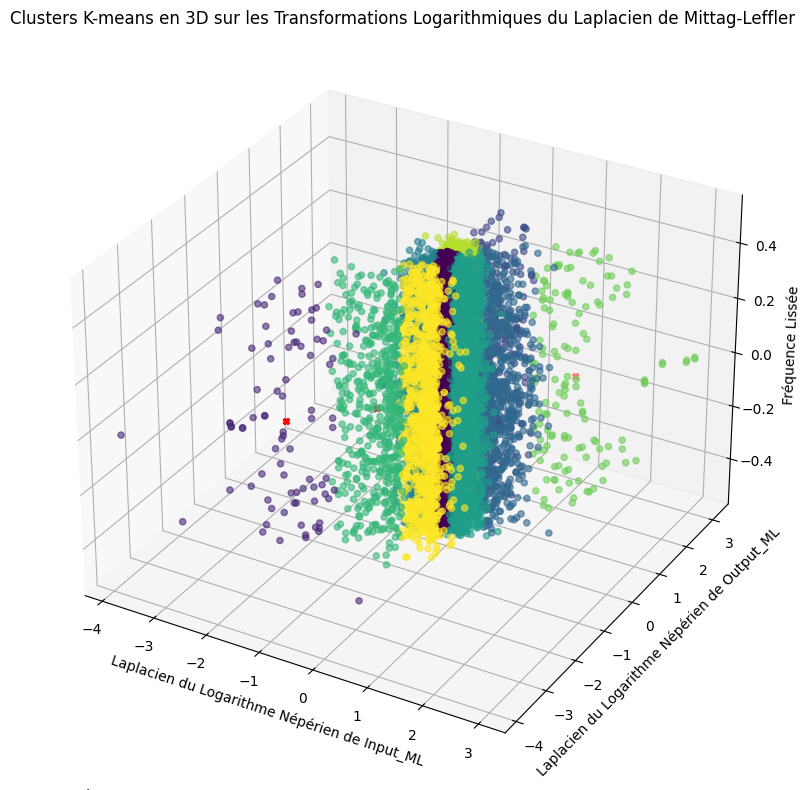

In [150]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma  # Pour la fonction gamma
from sklearn.cluster import KMeans  # Importer le modèle K-means
from mpl_toolkits.mplot3d import Axes3D  # Pour les graphiques en 3D

# Définir la taille de la figure avec projection 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))  # Conversion explicite en float
        if np.isinf(term):  # Stopper si on rencontre un infini
            break
        summation += term
    return summation

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:100]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Liste pour stocker les valeurs de laplacian_input_log_ml, laplacian_output_log_ml et les fréquences lissées
all_input_log_ml = []
all_output_log_ml = []
all_smooth_freqs = []

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))

    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    alpha, beta = 0.5, 1  
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    input_ml = np.array(input_ml, dtype=float)
    output_ml = np.array(output_ml, dtype=float)

    # Filtrer les valeurs négatives ou nulles avant de prendre le logarithme
    input_ml = np.where(input_ml > 0, input_ml, np.nan)
    output_ml = np.where(output_ml > 0, output_ml, np.nan)

    input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
    output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

    # Calcul du Laplacien (approximé par la dérivée seconde)
    laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
    laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

    # Stocker les résultats pour tous les échantillons
    all_input_log_ml.extend(laplacian_input_ml)
    all_output_log_ml.extend(laplacian_output_ml)
    all_smooth_freqs.extend(smooth_freqs)

# Convertir les listes en arrays NumPy pour les utiliser dans K-means
all_input_log_ml = np.array(all_input_log_ml).reshape(-1, 1)
all_output_log_ml = np.array(all_output_log_ml).reshape(-1, 1)
all_smooth_freqs = np.array(all_smooth_freqs).reshape(-1, 1)

# Appliquer le modèle K-means
data_points = np.hstack((all_input_log_ml, all_output_log_ml, all_smooth_freqs))
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)
labels = kmeans.labels_

# Tracer le nuage de points des clusters en 3D
ax.scatter(all_input_log_ml, all_output_log_ml, all_smooth_freqs, c=labels, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=20, c='red', marker='X')

# Ajouter des titres et des légendes
ax.set_title("Clusters K-means en 3D sur les Transformations Logarithmiques du Laplacien de Mittag-Leffler")
ax.set_xlabel("Laplacien du Logarithme Népérien de Input_ML")
ax.set_ylabel("Laplacien du Logarithme Népérien de Output_ML")
ax.set_zlabel("Fréquence Lissée")

plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


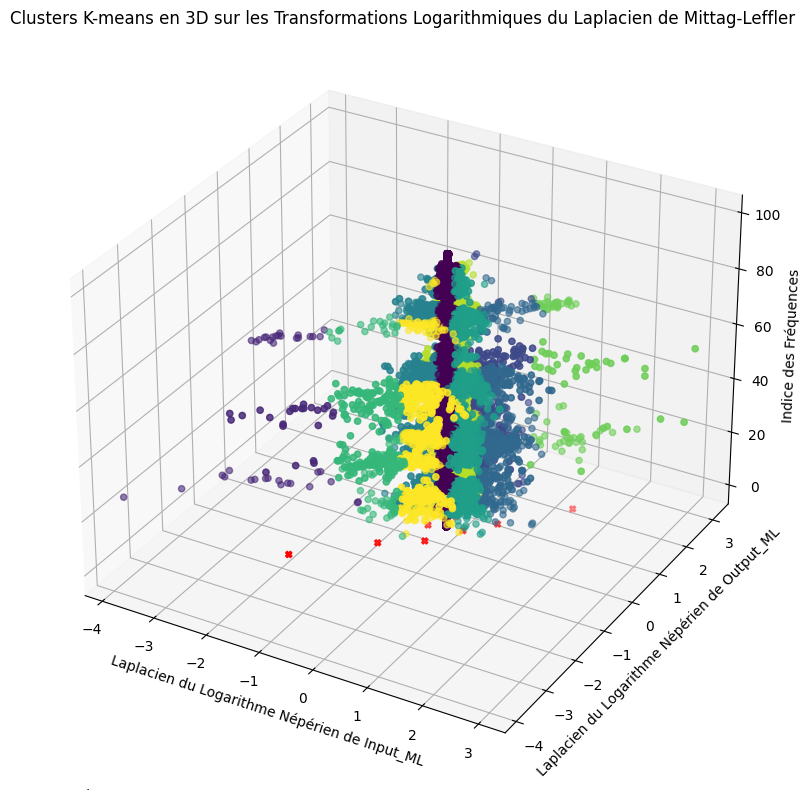

In [156]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma  # Pour la fonction gamma
from sklearn.cluster import KMeans  # Importer le modèle K-means
from mpl_toolkits.mplot3d import Axes3D  # Pour les graphiques en 3D

# Définir la taille de la figure avec projection 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))  # Conversion explicite en float
        if np.isinf(term):  # Stopper si on rencontre un infini
            break
        summation += term
    return summation

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:100]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Liste pour stocker les valeurs de laplacian_input_log_ml, laplacian_output_log_ml et les fréquences lissées
all_input_log_ml = []
all_output_log_ml = []
all_smooth_freqs = []
indices = []

for idx in range(len(matrices_input)):  # Utiliser `idx` comme variable d'itération
    input_flat = np.array(matrices_input[idx]).flatten()
    output_flat = np.array(matrices_output[idx]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))

    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    alpha, beta = 0.5, 1  
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    input_ml = np.array(input_ml, dtype=float)
    output_ml = np.array(output_ml, dtype=float)

    # Filtrer les valeurs négatives ou nulles avant de prendre le logarithme
    input_ml = np.where(input_ml > 0, input_ml, np.nan)
    output_ml = np.where(output_ml > 0, output_ml, np.nan)

    input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
    output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

    # Calcul du Laplacien (approximé par la dérivée seconde)
    laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
    laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

    # Stocker les résultats pour tous les échantillons
    all_input_log_ml.extend(laplacian_input_ml)
    all_output_log_ml.extend(laplacian_output_ml)
    all_smooth_freqs.extend(smooth_freqs)
    indices.extend([idx] * len(smooth_freqs))  # Expand `indices` to match the data point

# Convertir les listes en arrays NumPy pour les utiliser dans K-means
all_input_log_ml = np.array(all_input_log_ml).reshape(-1, 1)
all_output_log_ml = np.array(all_output_log_ml).reshape(-1, 1)
all_smooth_freqs = np.array(all_smooth_freqs).reshape(-1, 1)
indices = np.array(indices).reshape(-1, 1)

# Appliquer le modèle K-means
data_points = np.hstack((all_input_log_ml, all_output_log_ml, all_smooth_freqs))
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)
labels = kmeans.labels_

# Tracer le nuage de points des clusters en 3D
ax.scatter(all_input_log_ml, all_output_log_ml, indices, c=labels, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=20, c='red', marker='X')

# Ajouter des titres et des légendes
ax.set_title("Clusters K-means en 3D sur les Transformations Logarithmiques du Laplacien de Mittag-Leffler")
ax.set_xlabel("Laplacien du Logarithme Népérien de Input_ML")
ax.set_ylabel("Laplacien du Logarithme Népérien de Output_ML")
ax.set_zlabel("Indice des Fréquences")

plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


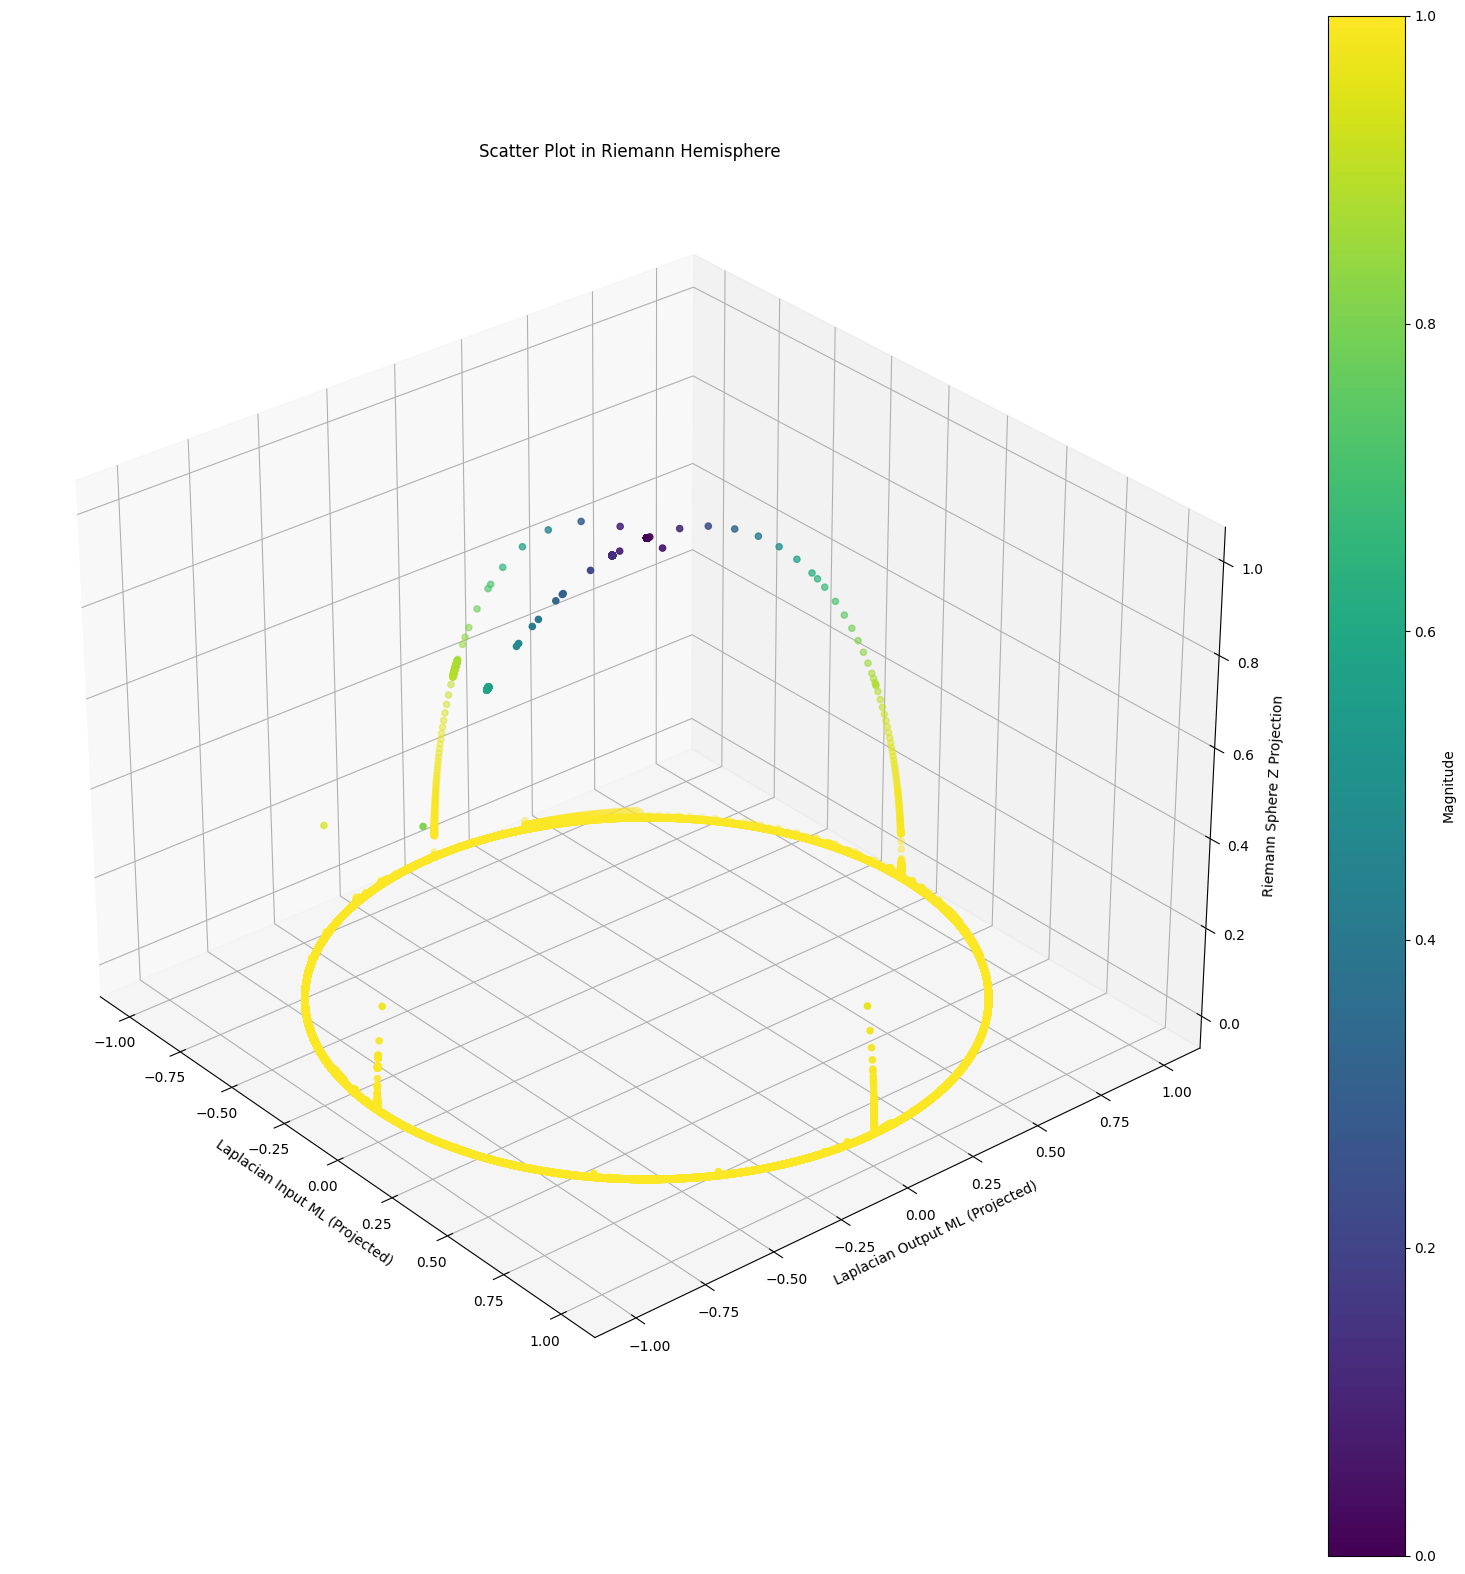

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma  # Pour la fonction gamma

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))  # Conversion explicite en float
        if np.isinf(term):  # Stopper si on rencontre un infini
            break
        summation += term
    return summation

# Define the dataset
dataset = train_set[:200]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Lists to store all Laplacian results
all_laplacian_input_ml = []
all_laplacian_output_ml = []

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))

    # Only keep positive frequencies for interpolation
    positive_freqs = freqs > 0
    freqs = freqs[positive_freqs]
    input_fft = np.abs(input_fft[positive_freqs])
    output_fft = np.abs(output_fft[positive_freqs])

    # Check if there are enough points for interpolation
    if len(freqs) > 1:
        input_interp = interp1d(freqs, input_fft, kind='linear', fill_value="extrapolate")
        output_interp = interp1d(freqs, output_fft, kind='linear', fill_value="extrapolate")

        smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

        alpha, beta = 0.5, 1  
        input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
        output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

        input_ml = np.array(input_ml, dtype=float)
        output_ml = np.array(output_ml, dtype=float)

        # Filtrer les valeurs négatives ou nulles avant de prendre le logarithme
        input_ml = np.where(input_ml > 0, input_ml, np.nan)
        output_ml = np.where(output_ml > 0, output_ml, np.nan)

        input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
        output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

        # Calcul du Laplacien (approximé par la dérivée seconde)
        laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
        laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

        # Accumuler les résultats
        all_laplacian_input_ml.extend(laplacian_input_ml)
        all_laplacian_output_ml.extend(laplacian_output_ml)

# Convertir les listes en arrays NumPy pour la projection
all_laplacian_input_ml = np.array(all_laplacian_input_ml)
all_laplacian_output_ml = np.array(all_laplacian_output_ml)

# Projection dans la demi-sphère de Riemann
def riemann_projection(x, y):
    norm = np.sqrt(x**2 + y**2 + 1)
    x_proj = x / norm
    y_proj = y / norm
    z_proj = 1 / norm
    return x_proj, y_proj, z_proj

x_proj, y_proj, z_proj = riemann_projection(all_laplacian_input_ml, all_laplacian_output_ml)

# Visualisation sous forme de nuages de points
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_proj, y_proj, z_proj, c=np.sqrt(x_proj**2 + y_proj**2), cmap='viridis')

# Modifier l'angle de vue
ax.view_init(elev=30, azim=-40)

ax.set_xlabel('Laplacian Input ML (Projected)')
ax.set_ylabel('Laplacian Output ML (Projected)')
ax.set_zlabel('Riemann Sphere Z Projection')
ax.set_title('Scatter Plot in Riemann Hemisphere')

# Ajouter une barre de couleur
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Magnitude')

plt.show()


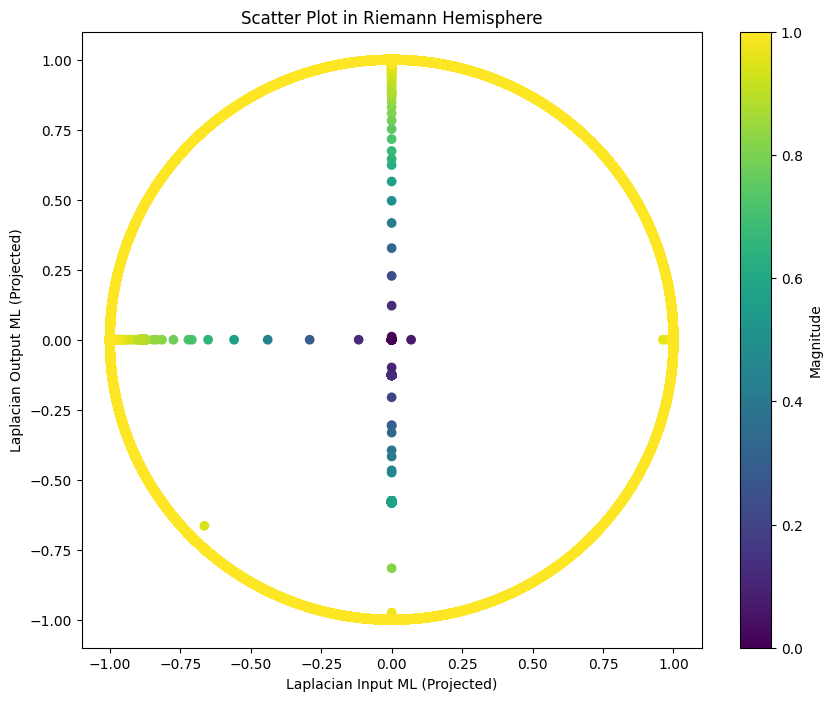

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma  # Pour la fonction gamma

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))  # Conversion explicite en float
        if np.isinf(term):  # Stopper si on rencontre un infini
            break
        summation += term
    return summation

# Define the dataset
dataset = train_set[:200]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Lists to store all Laplacian results
all_laplacian_input_ml = []
all_laplacian_output_ml = []

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))
    
    # Only keep positive frequencies for interpolation
    positive_freqs = freqs > 0
    freqs = freqs[positive_freqs]
    input_fft = np.abs(input_fft[positive_freqs])
    output_fft = np.abs(output_fft[positive_freqs])
    
    # Check if there are enough points for interpolation
    if len(freqs) > 1:
        try:
            input_interp = interp1d(freqs, input_fft, kind='linear', fill_value="extrapolate")
            output_interp = interp1d(freqs, output_fft, kind='linear', fill_value="extrapolate")

            smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

            alpha, beta = 0.5, 1  
            input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
            output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

            input_ml = np.array(input_ml, dtype=float)
            output_ml = np.array(output_ml, dtype=float)

            # Filtrer les valeurs négatives ou nulles avant de prendre le logarithme
            input_ml = np.where(input_ml > 0, input_ml, np.nan)
            output_ml = np.where(output_ml > 0, output_ml, np.nan)

            input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
            output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

            # Calcul du Laplacien (approximé par la dérivée seconde)
            laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
            laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

            # Accumuler les résultats
            all_laplacian_input_ml.extend(laplacian_input_ml)
            all_laplacian_output_ml.extend(laplacian_output_ml)
        except Exception as e:
            print(f"Interpolation or gradient error for dataset index {i}: {e}")

# Convertir les listes en arrays NumPy pour la projection
all_laplacian_input_ml = np.array(all_laplacian_input_ml)
all_laplacian_output_ml = np.array(all_laplacian_output_ml)

# Projection dans la demi-sphère de Riemann
def riemann_projection(x, y):
    norm = np.sqrt(x**2 + y**2 + 1)
    x_proj = x / norm
    y_proj = y / norm
    return x_proj, y_proj

x_proj, y_proj = riemann_projection(all_laplacian_input_ml, all_laplacian_output_ml)

# Visualisation sous forme de nuages de points (2D)
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(x_proj, y_proj, c=np.sqrt(x_proj**2 + y_proj**2), cmap='viridis')

ax.set_xlabel('Laplacian Input ML (Projected)')
ax.set_ylabel('Laplacian Output ML (Projected)')
ax.set_title('Scatter Plot in Riemann Hemisphere')

# Ajouter une barre de couleur
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Magnitude')

plt.show()


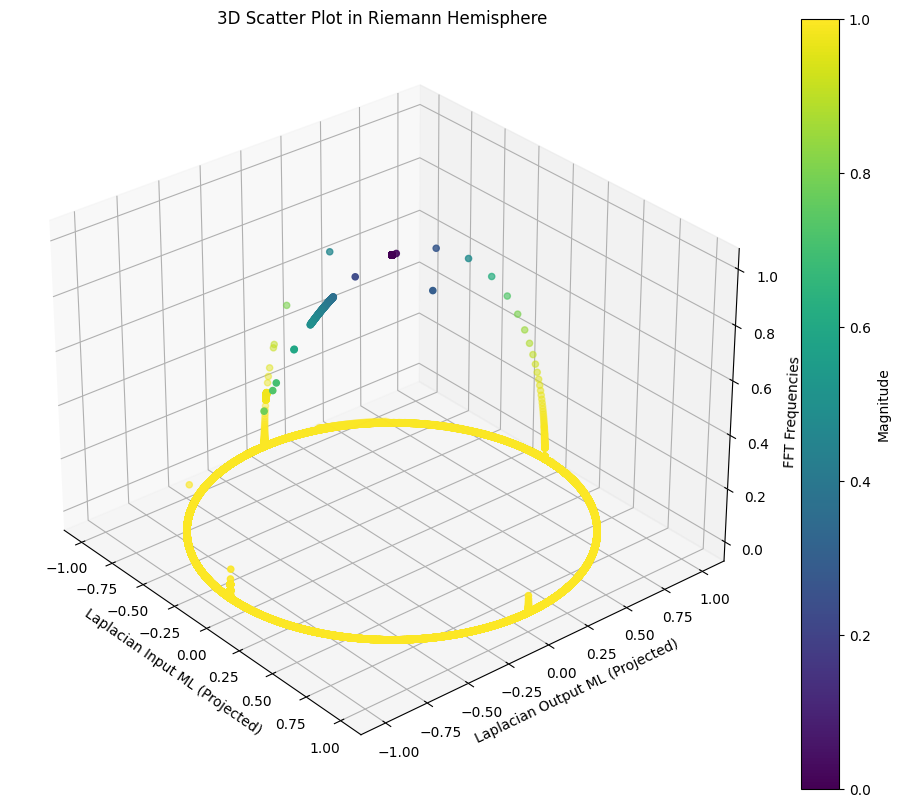

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma  # Pour la fonction gamma

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))  # Conversion explicite en float
        if np.isinf(term):  # Stopper si on rencontre un infini
            break
        summation += term
    return summation

# Define the dataset
dataset = train_set[:100]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Lists to store all Laplacian results
all_laplacian_input_ml = []
all_laplacian_output_ml = []
all_freqs = []

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))
    
    # Only keep positive frequencies for interpolation
    positive_freqs = freqs > 0
    freqs = freqs[positive_freqs]
    input_fft = np.abs(input_fft[positive_freqs])
    output_fft = np.abs(output_fft[positive_freqs])
    
    # Check if there are enough points for interpolation
    if len(freqs) > 1:
        try:
            input_interp = interp1d(freqs, input_fft, kind='linear', fill_value="extrapolate")
            output_interp = interp1d(freqs, output_fft, kind='linear', fill_value="extrapolate")

            smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

            alpha, beta = 0.5, 1  
            input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
            output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

            input_ml = np.array(input_ml, dtype=float)
            output_ml = np.array(output_ml, dtype=float)

            # Filtrer les valeurs négatives ou nulles avant de prendre le logarithme
            input_ml = np.where(input_ml > 0, input_ml, np.nan)
            output_ml = np.where(output_ml > 0, output_ml, np.nan)

            input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
            output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

            # Calcul du Laplacien (approximé par la dérivée seconde)
            laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
            laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

            # Accumuler les résultats
            all_laplacian_input_ml.extend(laplacian_input_ml)
            all_laplacian_output_ml.extend(laplacian_output_ml)
            all_freqs.extend(smooth_freqs)
        except Exception as e:
            print(f"Interpolation or gradient error for dataset index {i}: {e}")

# Convertir les listes en arrays NumPy pour la projection
all_laplacian_input_ml = np.array(all_laplacian_input_ml)
all_laplacian_output_ml = np.array(all_laplacian_output_ml)
all_freqs = np.array(all_freqs)

# Projection dans la demi-sphère de Riemann
def riemann_projection(x, y, z):
    norm = np.sqrt(x**2 + y**2 + z**2)
    x_proj = x / norm
    y_proj = y / norm
    z_proj = z / norm
    return x_proj, y_proj, z_proj

x_proj, y_proj, z_proj = riemann_projection(all_laplacian_input_ml, all_laplacian_output_ml, all_freqs)

# Visualisation sous forme de nuages de points (3D)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_proj, y_proj, z_proj, c=np.sqrt(x_proj**2 + y_proj**2), cmap='viridis')

ax.set_xlabel('Laplacian Input ML (Projected)')
ax.set_ylabel('Laplacian Output ML (Projected)')
ax.set_zlabel('FFT Frequencies')
ax.set_title('3D Scatter Plot in Riemann Hemisphere')

# Modifier l'angle de vue
ax.view_init(elev=30, azim=-40)

# Ajouter une barre de couleur
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Magnitude')

plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


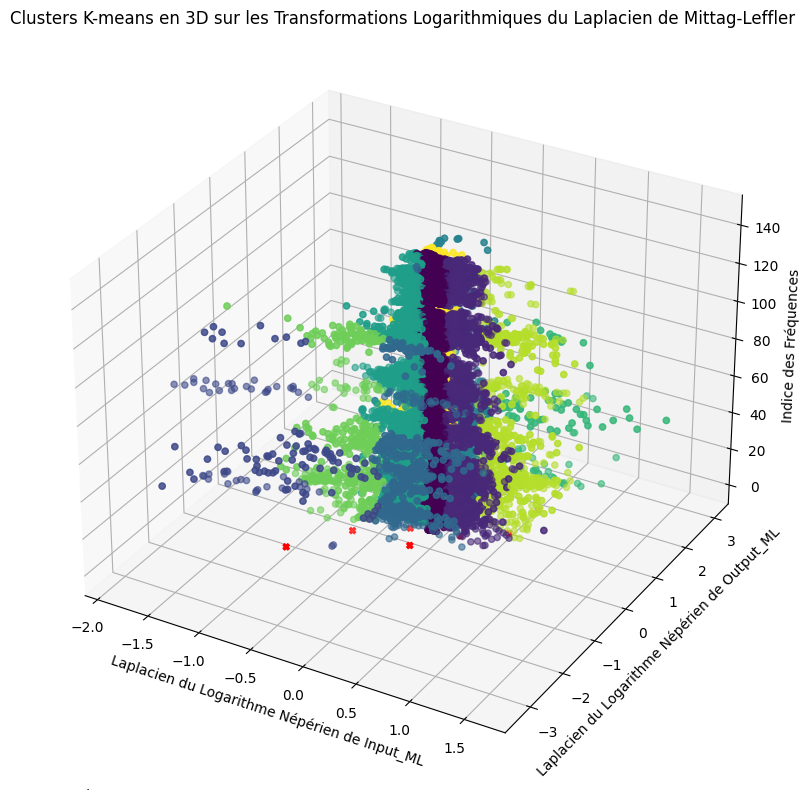

In [162]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma  # Pour la fonction gamma
from sklearn.cluster import KMeans  # Importer le modèle K-means
from mpl_toolkits.mplot3d import Axes3D  # Pour les graphiques en 3D

# Définir la taille de la figure avec projection 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))  # Conversion explicite en float
        if np.isinf(term):  # Stopper si on rencontre un infini
            break
        summation += term
    return summation

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:150]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Liste pour stocker les valeurs de laplacian_input_log_ml, laplacian_output_log_ml et les fréquences lissées
all_input_log_ml = []
all_output_log_ml = []
all_smooth_freqs = []
indices0 = []

for idx in range(len(matrices_input)):
    input_flat = np.array(matrices_input[idx]).flatten()
    output_flat = np.array(matrices_output[idx]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))

    # Handle possible empty or problematic data
    if len(freqs) < 2 or len(input_fft) < 2:
        continue

    # Using linear interpolation instead of cubic
    input_interp = interp1d(freqs, np.abs(input_fft), kind='linear', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='linear', fill_value="extrapolate")

    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    alpha, beta = 0.5, 1  
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    input_ml = np.array(input_ml, dtype=float)
    output_ml = np.array(output_ml, dtype=float)

    # Filtrer les valeurs négatives ou nulles avant de prendre le logarithme
    input_ml = np.where(input_ml > 0, input_ml, np.nan)
    output_ml = np.where(output_ml > 0, output_ml, np.nan)

    input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
    output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

    # Calcul du Laplacien (approximé par la dérivée seconde)
    laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
    laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

    # Stocker les résultats pour tous les échantillons
    all_input_log_ml.extend(laplacian_input_ml)
    all_output_log_ml.extend(laplacian_output_ml)
    all_smooth_freqs.extend(smooth_freqs)
    indices0.extend([idx] * len(smooth_freqs))  # Utiliser `idx` pour chaque fréquence

# Convertir les listes en arrays NumPy pour les utiliser dans K-means
all_input_log_ml = np.array(all_input_log_ml).reshape(-1, 1)
all_output_log_ml = np.array(all_output_log_ml).reshape(-1, 1)
all_smooth_freqs = np.array(all_smooth_freqs).reshape(-1, 1)
indices0 = np.array(indices0).reshape(-1, 1)

# Appliquer le modèle K-means
data_points = np.hstack((all_input_log_ml, all_output_log_ml, all_smooth_freqs))
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)
labels = kmeans.labels_

ax.scatter(all_input_log_ml, all_output_log_ml, indices0, c=labels, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=20, c='red', marker='X')

# Ajouter des titres et des légendes
ax.set_title("Clusters K-means en 3D sur les Transformations Logarithmiques du Laplacien de Mittag-Leffler")
ax.set_xlabel("Laplacien du Logarithme Népérien de Input_ML")
ax.set_ylabel("Laplacien du Logarithme Népérien de Output_ML")
ax.set_zlabel("Indice des Fréquences")

plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


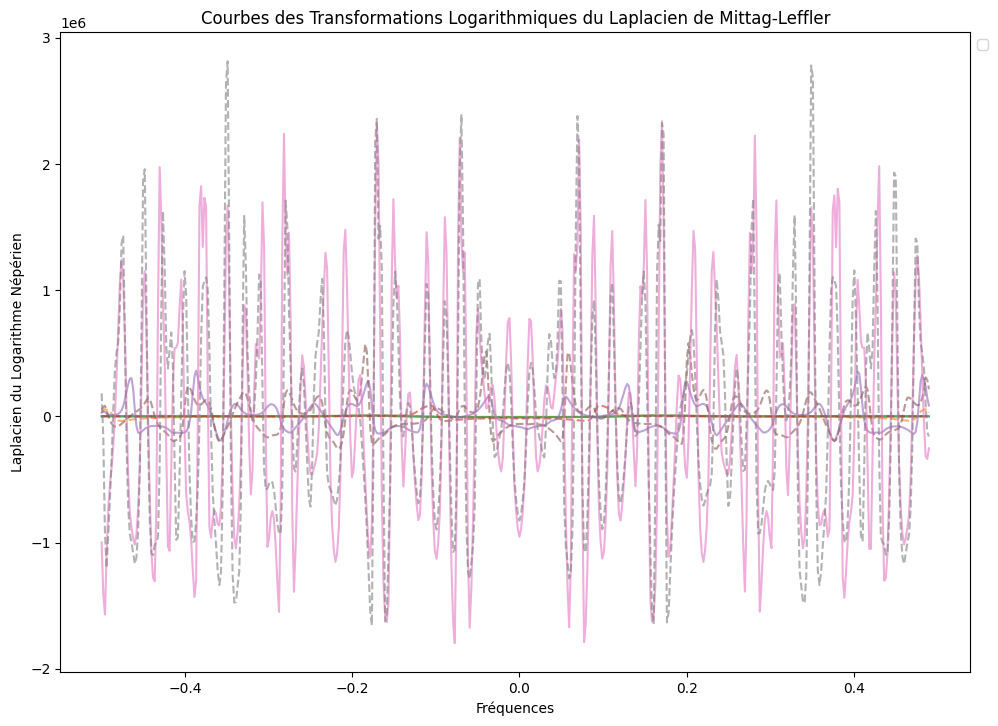

In [163]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import gamma
from sklearn.cluster import KMeans

plt.figure(figsize=(14, 8))  # Augmenter la taille de la figure

def mittag_leffler(alpha, beta, z, n_terms=50):
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))
        if np.isinf(term):
            break
        summation += term
    return summation

dataset = train_set[3:7]

matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

all_input_log_ml = []
all_output_log_ml = []

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    freqs = np.fft.fftfreq(len(input_flat))

    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    alpha, beta = 0.5, 1  
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    input_ml = np.array(input_ml, dtype=float)
    output_ml = np.array(output_ml, dtype=float)

    input_ml = np.where(input_ml > 0, input_ml, np.nan)
    output_ml = np.where(output_ml > 0, output_ml, np.nan)

    input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
    output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

    laplacian_input_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
    laplacian_output_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

#     all_input_log_ml.append(input_log_ml)
#     all_output_log_ml.append(output_log_ml)
    
    all_input_log_ml.append(laplacian_input_ml)
    all_output_log_ml.append(laplacian_output_ml)

for i in range(len(all_input_log_ml)):
    plt.plot(smooth_freqs, all_input_log_ml[i], alpha=0.6) #, label=f'Input_ML Sample {i+1}', alpha=0.6)
    plt.plot(smooth_freqs, all_output_log_ml[i], linestyle='dashed', alpha=0.6) #, label=f'Output_ML Sample {i+1}', linestyle='dashed', alpha=0.6)

plt.title("Courbes des Transformations Logarithmiques du Laplacien de Mittag-Leffler")
plt.xlabel("Fréquences")
plt.ylabel("Laplacien du Logarithme Népérien")

# Placer la légende à l'extérieur du graphique
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Ajuster les marges manuellement
plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)

plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


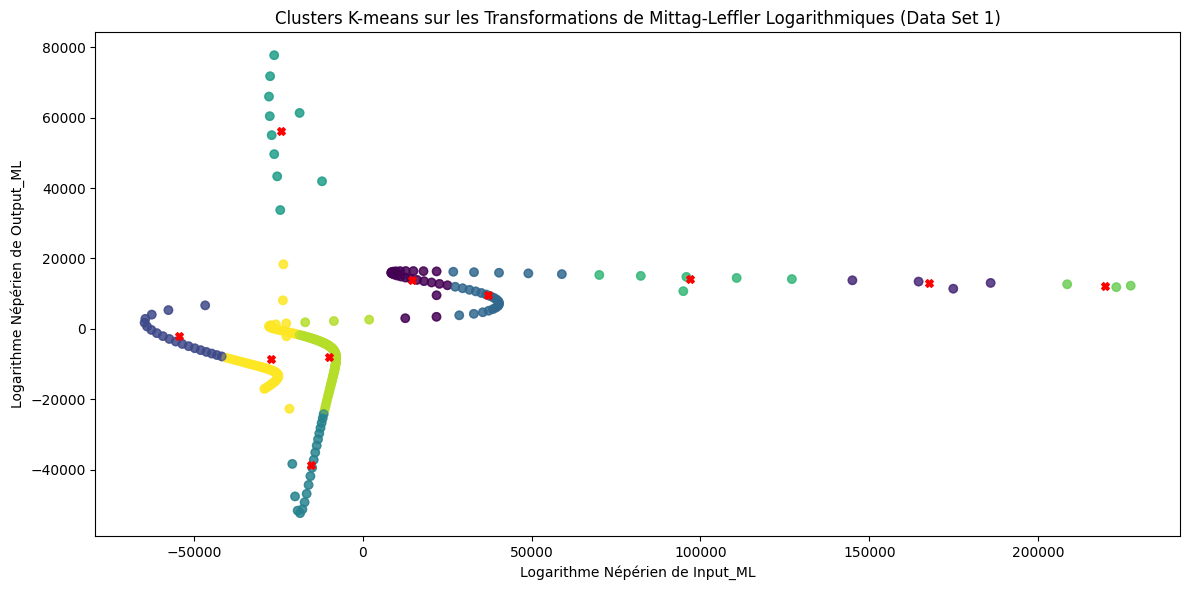

In [192]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import ln  # Pour le logarithme népérien avec mpmathfrom sklearn.cluster import KMeans  # Importer le modèle K-means
def mittag_leffler(alpha, beta, z, n_terms=100):
    """
    Calcule la fonction de Mittag-Leffler E_{alpha,beta}(z) en utilisant une série tronquée.

    Parameters:
    alpha : float
        Le paramètre α de la fonction de Mittag-Leffler.
    beta : float
        Le paramètre β de la fonction de Mittag-Leffler.
    z : complex
        Le point d'évaluation z (peut être un nombre réel ou complexe).
    n_terms : int, optional
        Le nombre de termes à utiliser dans la série (plus il est élevé, plus la précision est grande).

    Returns:
    float
        La valeur de la fonction de Mittag-Leffler en z.
    """
    summation = 0
    for k in range(n_terms):
        summation += (z**k) / gamma(alpha*k + beta)
    return summation

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:10]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Interpolation pour les inputs et outputs
    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    # Créer des points de fréquence pour une courbe plus lisse
    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    # Calculer la transformation de Mittag-Leffler sur les fréquences interpolées
    alpha, beta = 0.5, 1# Exemple de paramètres pour la fonction Mittag-Leffler
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    # Appliquer le logarithme népérien sur les sorties de Mittag-Leffler
    input_log_ml = np.array([ln(val).real for val in input_ml], dtype=float)
    output_log_ml = np.array([ln(val).real for val in output_ml], dtype=float)
    
    # Calculer le Laplacien des transformations Mittag-Leffler logarithmiques
    input_laplacian_ml = np.sum([np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)], axis=0)
    output_laplacian_ml = np.sum([np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)], axis=0)
    
    # Convertir les données en array NumPy pour K-means
    input_laplacian_ml = input_laplacian_ml.reshape(-1, 1)
    output_laplacian_ml = output_laplacian_ml.reshape(-1, 1)
    
    # Appliquer le modèle K-means
    data_points = np.hstack((input_laplacian_ml, output_laplacian_ml))
    kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)
    labels = kmeans.labels_

    # Tracer le nuage de points des clusters
    plt.figure(figsize=(12, 6))
    plt.scatter(input_laplacian_ml, output_laplacian_ml, c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', marker='X')

    # Ajout de titres et de légendes
    plt.title(f"Clusters K-means sur les Transformations de Mittag-Leffler Logarithmiques (Data Set {i+1})")
    plt.xlabel("Logarithme Népérien de Input_ML")
    plt.ylabel("Logarithme Népérien de Output_ML")

plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


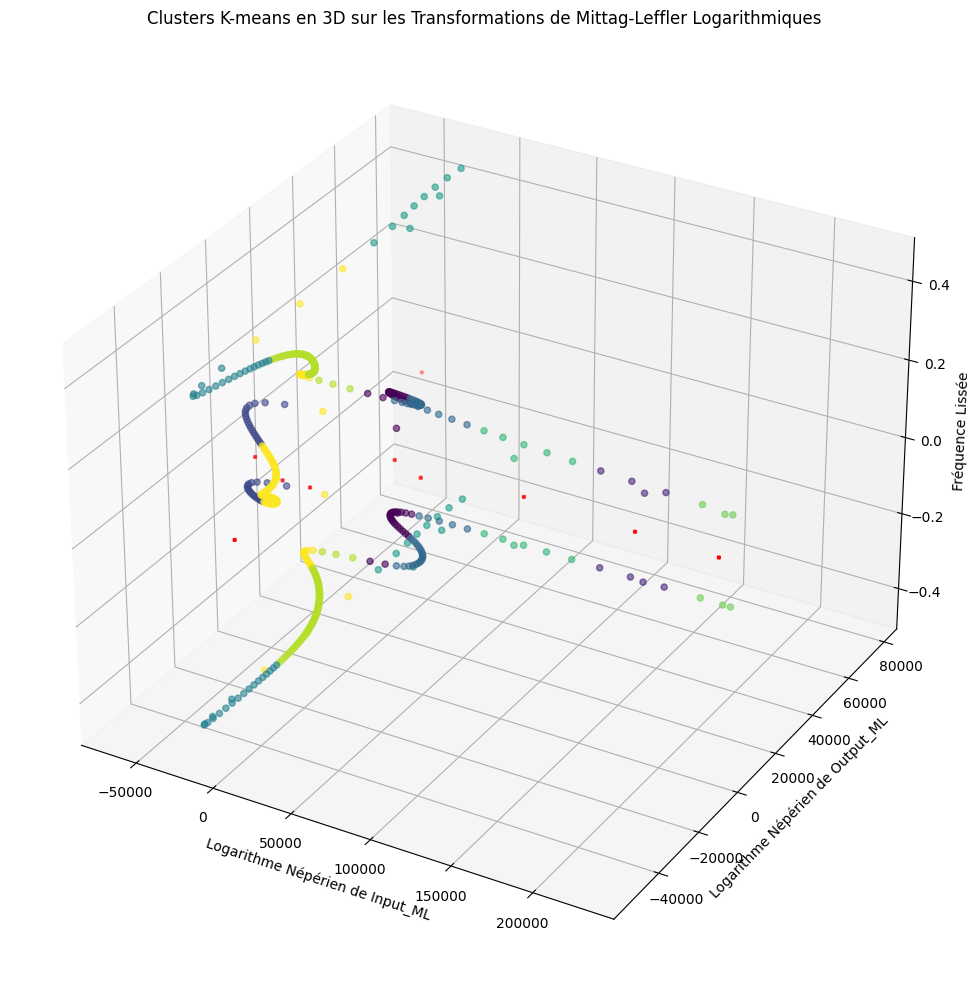

In [173]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import ln  # Pour le logarithme népérien avec mpmath
from sklearn.cluster import KMeans  # Importer le modèle K-means
from mpl_toolkits.mplot3d import Axes3D  # Pour les graphiques en 3D

# Définir la taille de la figure avec projection 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

def mittag_leffler(alpha, beta, z, n_terms=100):
    """
    Calcule la fonction de Mittag-Leffler E_{alpha,beta}(z) en utilisant une série tronquée.
    """
    summation = 0
    for k in range(n_terms):
        summation += (z**k) / gamma(alpha*k + beta)
    return summation

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:1]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Liste pour stocker les valeurs de input_log_ml, output_log_ml et les fréquences lissées
all_input_log_ml = []
all_output_log_ml = []
all_smooth_freqs = []

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Interpolation pour les inputs et outputs
    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    # Créer des points de fréquence pour une courbe plus lisse
    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    # Calculer la transformation de Mittag-Leffler sur les fréquences interpolées
    alpha, beta = 0.5, 1  # Exemple de paramètres pour la fonction Mittag-Leffler
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    # Appliquer le logarithme népérien sur les sorties de Mittag-Leffler
    input_log_ml = np.array([ln(val).real for val in input_ml], dtype=float)
    output_log_ml = np.array([ln(val).real for val in output_ml], dtype=float)
    
    # Calculer le Laplacien des transformations Mittag-Leffler logarithmiques
    input_laplacian_ml = np.sum([np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)], axis=0)
    output_laplacian_ml = np.sum([np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)], axis=0)
    
    # Convertir les données en array NumPy pour K-means
#     input_laplacian_ml = input_laplacian_ml.reshape(-1, 1)
#     output_laplacian_ml = output_laplacian_ml.reshape(-1, 1)

    # Stocker les résultats pour tous les échantillons
    all_input_log_ml.extend(input_laplacian_ml)
    all_output_log_ml.extend(output_laplacian_ml)
    all_smooth_freqs.extend(smooth_freqs)

# Convertir les listes en arrays NumPy pour les utiliser dans K-means
all_input_log_ml = np.array(all_input_log_ml).reshape(-1, 1)
all_output_log_ml = np.array(all_output_log_ml).reshape(-1, 1)
all_smooth_freqs = np.array(all_smooth_freqs).reshape(-1, 1)

# Appliquer le modèle K-means
data_points = np.hstack((all_input_log_ml, all_output_log_ml, all_smooth_freqs))
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)
labels = kmeans.labels_

# Tracer le nuage de points des clusters en 3D
ax.scatter(all_input_log_ml, all_output_log_ml, all_smooth_freqs, c=labels, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=5, c='red', marker='X')

# Ajouter des titres et des légendes
ax.set_title("Clusters K-means en 3D sur les Transformations de Mittag-Leffler Logarithmiques")
ax.set_xlabel("Logarithme Népérien de Input_ML")
ax.set_ylabel("Logarithme Népérien de Output_ML")
ax.set_zlabel("Fréquence Lissée")

plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


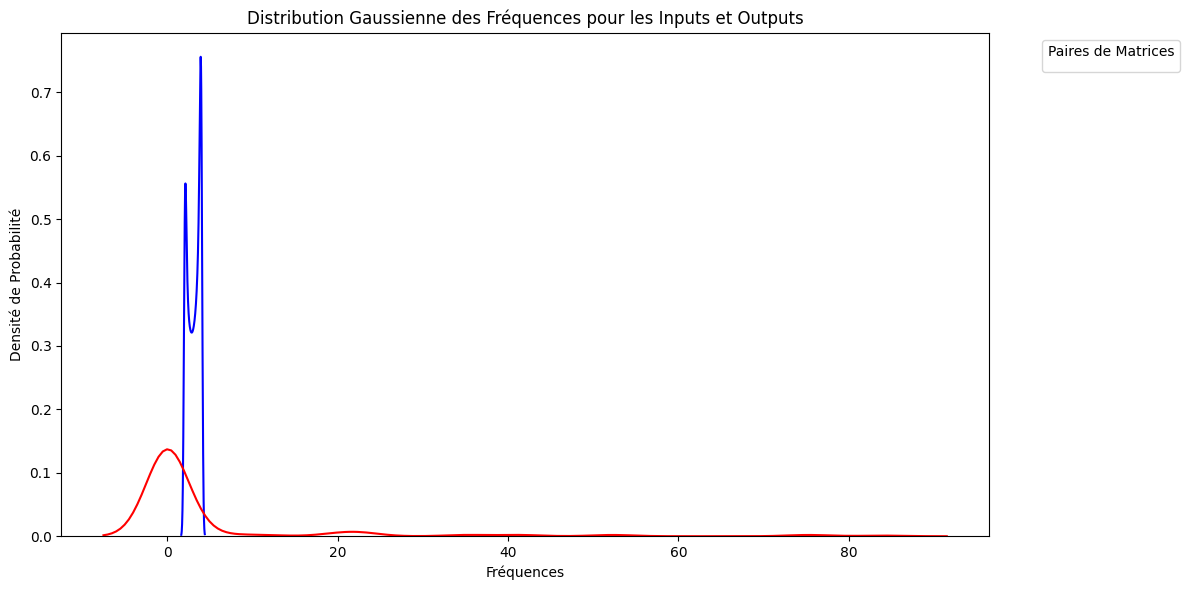

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[39:40]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:len(input_flat)]
    output_flat = output_flat[:len(output_flat)]
#     input_flat = input_flat[:min_length]
#     output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Calculer la densité gaussienne (KDE) pour les fréquences des input et output
    sns.kdeplot(np.abs(input_fft), bw_adjust=0.5, color='blue', fill=False) #, label=f"Input Pair {i+1}", color='blue', fill=True)
    sns.kdeplot(np.abs(output_fft), bw_adjust=0.5, color='red', fill=False) #, label=f"Output Pair {i+1}", color='red', fill=True)

# Ajout de titres et de légendes
plt.title("Distribution Gaussienne des Fréquences pour les Inputs et Outputs")
plt.xlabel("Fréquences")
plt.ylabel("Densité de Probabilité")

# Utilisation de plt.legend() pour distinguer les différentes paires
plt.legend(title="Paires de Matrices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour éviter les coupures de légende
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


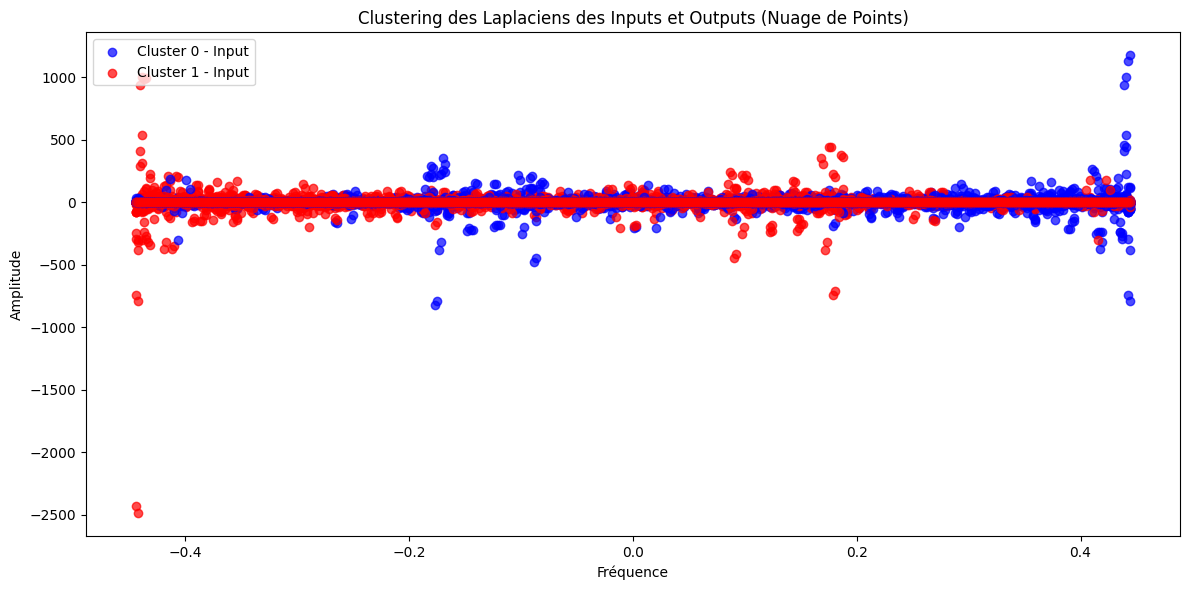

In [177]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import laplace
from sklearn.cluster import KMeans

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Simuler la structure de `train_set` pour la démonstration
dataset = train_set[:50]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Initialiser les listes pour stocker les laplaciens
all_laplacians = []

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Interpolation pour les inputs et outputs
    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    # Créer des points de fréquence pour une courbe plus lisse
    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    # Calculer le laplacien sur les données interpolées
    input_laplacian = laplace(input_interp(smooth_freqs))
    output_laplacian = laplace(output_interp(smooth_freqs))

    # Stocker les laplaciens pour le clustering, en les aplatissant
    all_laplacians.append(np.column_stack((input_laplacian, output_laplacian)).flatten())

# Convertir la liste des laplaciens en un tableau 2D pour K-means
all_laplacians = np.array(all_laplacians)

# Appliquer K-means sur les laplaciens
kmeans = KMeans(n_clusters=5)  # Par exemple, 5 clusters
labels = kmeans.fit_predict(all_laplacians)

# Tracer le nuage de points des Laplaciens pour chaque paire avec les labels de K-means
for i, laplacians in enumerate(all_laplacians):
    # Redimensionner les laplaciens pour correspondre aux fréquences lissées
    laplacians = laplacians.reshape(2, -1)
    input_laplacian, output_laplacian = laplacians

    # Tracer le nuage de points
    plt.scatter(smooth_freqs, input_laplacian, color='blue', alpha=0.7, label=f'Cluster {labels[i]} - Input' if i == 0 else "")
    plt.scatter(smooth_freqs, output_laplacian, color='red', alpha=0.7, label=f'Cluster {labels[i]} - Output' if i == 0 else "")

# Ajouter des titres et montrer le graphique
plt.title("Clustering des Laplaciens des Inputs et Outputs (Nuage de Points)")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")
plt.tight_layout()

# Afficher la légende une seule fois par couleur pour chaque cluster
handles, _ = plt.gca().get_legend_handles_labels()
by_label = dict(zip(handles, [f'Cluster {i} - Input' for i in range(5)] + [f'Cluster {i} - Output' for i in range(5)]))
plt.legend(by_label.values(), loc='upper left')

plt.show()


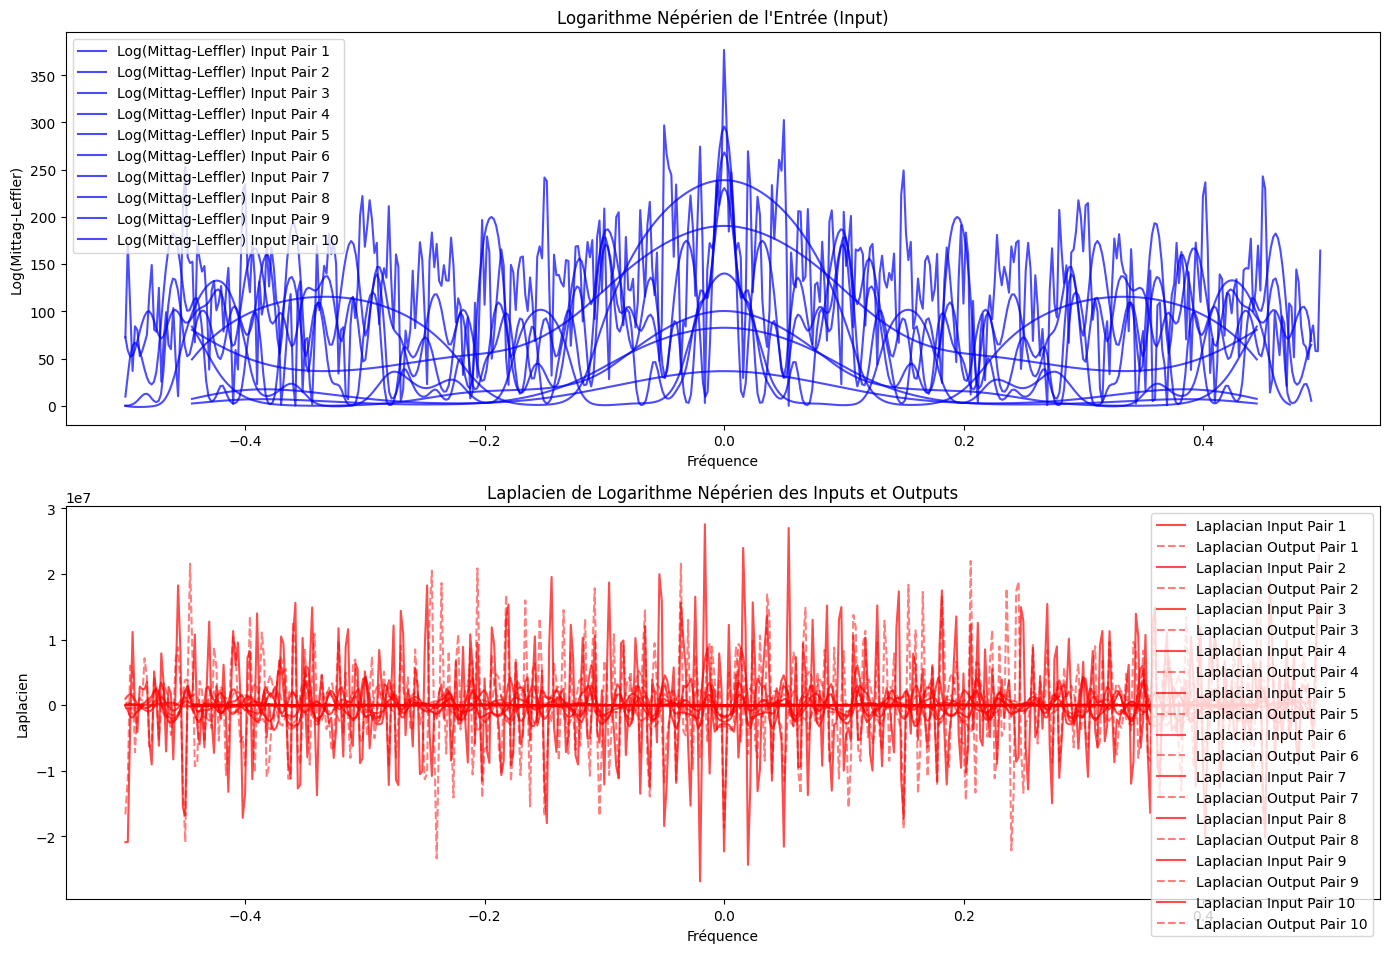

In [178]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import simps
from mpmath import ln, gamma

# Définir la taille de la figure avec deux sous-graphiques
plt.figure(figsize=(14, 10))

def mittag_leffler(alpha, beta, z, n_terms=100):
    """
    Calcule la fonction de Mittag-Leffler E_{alpha,beta}(z) en utilisant une série tronquée.
    """
    summation = 0
    for k in range(n_terms):
        summation += (z**k) / gamma(alpha*k + beta)
    return float(summation)  # Convertir en float pour compatibilité avec NumPy# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:10]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Boucle à travers chaque paire de matrices input et output
for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Interpolation pour les inputs et outputs
    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    # Créer des points de fréquence pour une courbe plus lisse
    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    # Calculer la transformation de Mittag-Leffler sur les fréquences interpolées
    alpha, beta = 0.5, 1# Exemple de paramètres pour la fonction Mittag-Leffler
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    # Appliquer le logarithme népérien sur les sorties de Mittag-Leffler
    input_log_ml = np.array([ln(val).real for val in input_ml], dtype=float)
    output_log_ml = np.array([ln(val).real for val in output_ml], dtype=float)

    # Calculer le Laplacien (approximé par la dérivée seconde)
    laplacian_input_log_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
    laplacian_output_log_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)

    # Premier sous-graphe pour l'entrée (input)
    plt.subplot(2, 1, 1)
    plt.plot(smooth_freqs, input_log_ml, linestyle='-', color='blue', alpha=0.7, label=f"Log(Mittag-Leffler) Input Pair {i+1}")
    plt.title("Logarithme Népérien de l'Entrée (Input)")
    plt.xlabel("Fréquence")
    plt.ylabel("Log(Mittag-Leffler)")
    plt.legend()

    # Deuxième sous-graphe pour la sortie (output)
    plt.subplot(2, 1, 2)
    plt.plot(smooth_freqs, laplacian_input_log_ml, linestyle='-', color='red', alpha=0.7, label=f"Laplacian Input Pair {i+1}")
    plt.plot(smooth_freqs, laplacian_output_log_ml, linestyle='--', color='red', alpha=0.5, label=f"Laplacian Output Pair {i+1}")
    plt.title("Laplacien de Logarithme Népérien des Inputs et Outputs")
    plt.xlabel("Fréquence")
    plt.ylabel("Laplacien")
    plt.legend()

# Ajustement pour éviter les chevauchements
plt.tight_layout()
plt.show()


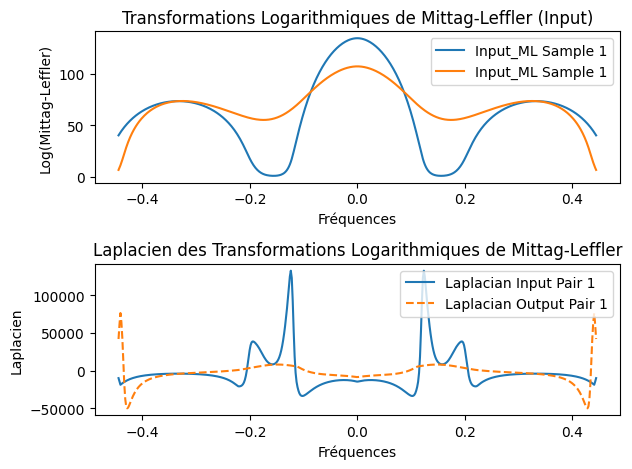

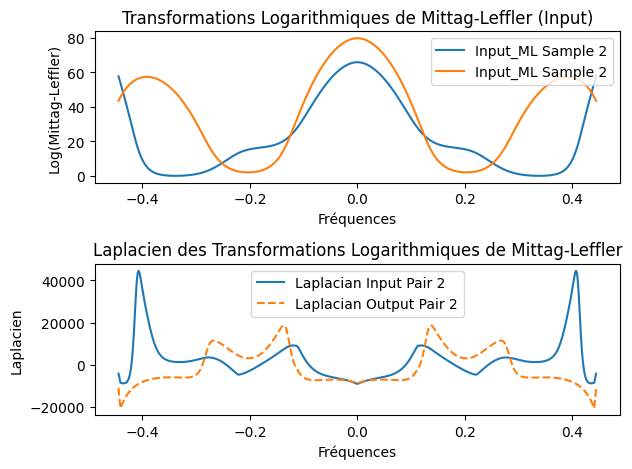

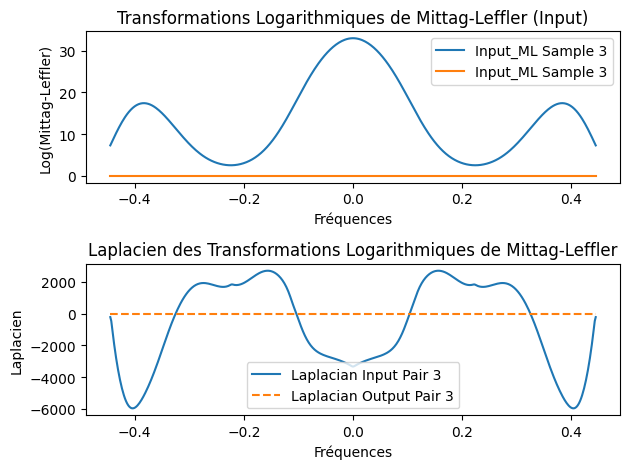

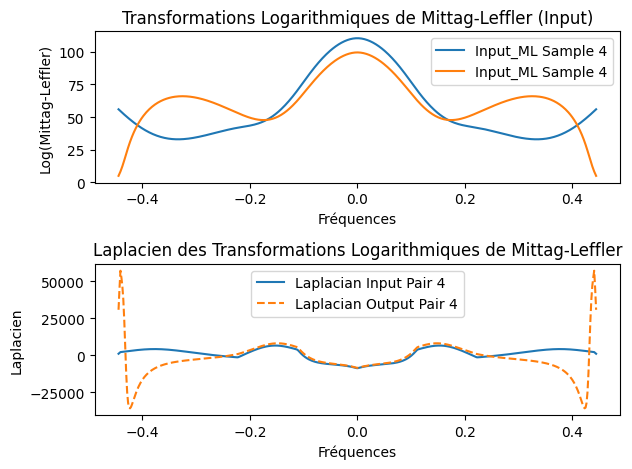

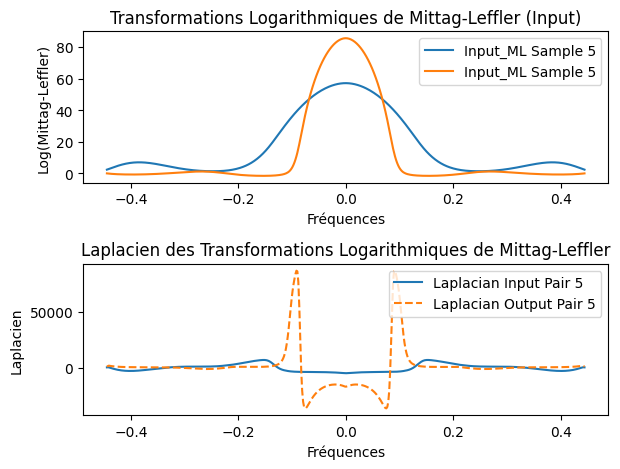

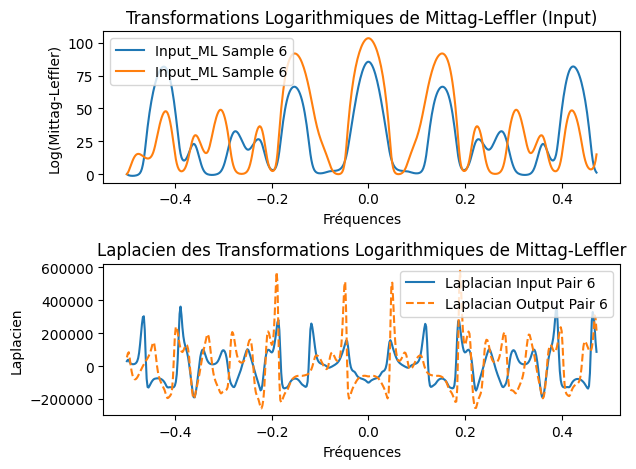

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import ln, gamma
from scipy.ndimage import laplace  # Importer la fonction Laplacian de scipy.ndimagefrom mpmath import gamma  # Pour la fonction gamma 

def mittag_leffler(alpha, beta, z, n_terms=50):
    """
    Calcule la fonction de Mittag-Leffler E_{alpha,beta}(z) en utilisant une série tronquée.
    """
    summation = 0
    for k in range(n_terms):
        term = (z**k) / float(gamma(alpha*k + beta))  # Conversion explicite en floatif np.isinf(term):  # Stopper si on rencontre un infinibreak
        summation += term
    return summation

# Simuler la structure de données `train_set` pour cette démonstration
dataset = train_set[:6]

# Extraire les matrices d'entrée et de sortie
matrices_input = [data['input'] for data in dataset]
matrices_output = [data['output'] for data in dataset]

# Listes pour stocker les résultats
all_input_log_ml = []
all_output_log_ml = []

for i in range(len(matrices_input)):
    input_flat = np.array(matrices_input[i]).flatten()
    output_flat = np.array(matrices_output[i]).flatten()

    # S'assurer que les deux matrices ont la même longueur
    min_length = min(len(input_flat), len(output_flat))
    input_flat = input_flat[:min_length]
    output_flat = output_flat[:min_length]
#     input_flat = input_flat[:len(input_flat)]
#     output_flat = output_flat[:len(output_flat)]

    # Convertir les valeurs infinies en NaN
    input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
    output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

    # Remplacer les NaN par des zéros pour pouvoir appliquer la FFT
    input_flat = np.nan_to_num(input_flat)
    output_flat = np.nan_to_num(output_flat)

    # Appliquer la transformation de Fourier rapide (FFT)
    input_fft = np.fft.fft(input_flat)
    output_fft = np.fft.fft(output_flat)

    # Calculer les fréquences associées
    freqs = np.fft.fftfreq(len(input_flat))

    # Interpolation pour les inputs et outputs
    input_interp = interp1d(freqs, np.abs(input_fft), kind='cubic', fill_value="extrapolate")
    output_interp = interp1d(freqs, np.abs(output_fft), kind='cubic', fill_value="extrapolate")

    # Créer des points de fréquence pour une courbe plus lisse
    smooth_freqs = np.linspace(freqs.min(), freqs.max(), num=500)

    # Calculer la transformation de Mittag-Leffler sur les fréquences interpolées
    alpha, beta = 0.5, 1# Exemple de paramètres pour la fonction Mittag-Leffler
    input_ml = np.array([mittag_leffler(alpha, beta, val) for val in input_interp(smooth_freqs)])
    output_ml = np.array([mittag_leffler(alpha, beta, val) for val in output_interp(smooth_freqs)])

    # Appliquer le logarithme népérien sur les sorties de Mittag-Leffler
    input_log_ml = np.log(np.nan_to_num(input_ml, nan=1.0))
    output_log_ml = np.log(np.nan_to_num(output_ml, nan=1.0))

    # Calculer le Laplacien (approximé par la dérivée seconde)# Laplace de scipy.ndimage attend une entrée 2D. Utiliser np.gradient pour une entrée 1D
    laplacian_input_log_ml = np.gradient(np.gradient(input_log_ml, smooth_freqs), smooth_freqs)
    laplacian_output_log_ml = np.gradient(np.gradient(output_log_ml, smooth_freqs), smooth_freqs)
    
    all_input_log_ml.append(input_log_ml)
    all_output_log_ml.append(output_log_ml)

    # Tracer les courbes
    plt.subplot(2, 1, 1)
    plt.plot(smooth_freqs, input_log_ml, label=f'Input_ML Sample {i+1}')
    plt.plot(smooth_freqs, output_log_ml, label=f'Input_ML Sample {i+1}')
    plt.title("Transformations Logarithmiques de Mittag-Leffler (Input)")
    plt.xlabel("Fréquences")
    plt.ylabel("Log(Mittag-Leffler)")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(smooth_freqs, laplacian_input_log_ml, label=f'Laplacian Input Pair {i+1}')
    plt.plot(smooth_freqs, laplacian_output_log_ml, linestyle='dashed', label=f'Laplacian Output Pair {i+1}')
    plt.title("Laplacien des Transformations Logarithmiques de Mittag-Leffler")
    plt.xlabel("Fréquences")
    plt.ylabel("Laplacien")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [39]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d
# from scipy.ndimage import laplace  # Import correct pour le Laplacien
# from mpmath import gamma
# from sklearn.cluster import KMeans

# plt.figure(figsize=(12, 6))

# def mittag_leffler(alpha, beta, z, n_terms=50):
#     summation = 0
#     for k in range(n_terms):
#         term = (z**k) / float(gamma(alpha*k + beta))
#         if np.isinf(term):
#             break
#         summation += term
#     return summation

# # Simuler la structure de données `train_set` pour cette démonstration
# # Remplacez ceci par vos données réelles
# train_set = train_set[:5]

# matrices_input = [data['input'] for data in train_set]
# matrices_output = [data['output'] for data in train_set]

# all_input_log_ml = []
# all_output_log_ml = []
# laplacians_input = []
# laplacians_output = []

# for i in range(len(matrices_input)):
#     input_flat = np.array(matrices_input[i]).flatten()
#     output_flat = np.array(matrices_output[i]).flatten()

#     min_length = min(len(input_flat), len(output_flat))
#     input_flat = input_flat[:min_length]
#     output_flat = output_flat[:min_length]

#     input_flat = np.where(np.isfinite(input_flat), input_flat, np.nan)
#     output_flat = np.where(np.isfinite(output_flat), output_flat, np.nan)

#     input_flat = np.nan_to_num(input_flat)
#     output_flat = np.nan_to_num(output_flat)

#     alpha = 0.5  # Valeur de alpha pour la fonction Mittag-Leffler
#     beta = 1.0   # Valeur de beta pour la fonction Mittag-Leffler
    
#     # Appliquer la fonction Mittag-Leffler
#     input_ml = np.array([mittag_leffler(alpha, beta, x) for x in input_flat])
#     output_ml = np.array([mittag_leffler(alpha, beta, x) for x in output_flat])

#     all_input_log_ml.append(input_ml)
#     all_output_log_ml.append(output_ml)

#     # Calcul du Laplacien des données
#     original_shape_input = matrices_input[i].shape  # Récupérer la forme originale
#     original_shape_output = matrices_output[i].shape  # Récupérer la forme originale

#     laplacian_input = laplace(input_ml.reshape(original_shape_input))
#     laplacian_output = laplace(output_ml.reshape(original_shape_output))

#     laplacians_input.append(laplacian_input)
#     laplacians_output.append(laplacian_output)

# # Afficher les graphiques pour toutes les matrices
# plt.subplot(2, 2, 1)
# sns.heatmap(laplacians_input[0], cmap='coolwarm')
# plt.title(f'Laplacian Input Matrix 1')

# plt.subplot(2, 2, 2)
# sns.heatmap(laplacians_output[0], cmap='coolwarm')
# plt.title(f'Laplacian Output Matrix 1')

# plt.subplot(2, 2, 3)
# plt.plot(all_input_log_ml[0], label='Input Mittag-Leffler')
# plt.plot(all_output_log_ml[0], label='Output Mittag-Leffler')
# plt.legend()
# plt.title(f'Mittag-Leffler Transformation 1')

# plt.subplot(2, 2, 4)
# plt.plot(laplacians_input[0].flatten(), label='Laplacian Input')
# plt.plot(laplacians_output[0].flatten(), label='Laplacian Output')
# plt.legend()
# plt.title(f'Laplacian Transformation 1')

# plt.tight_layout()
# plt.show()


AttributeError: 'list' object has no attribute 'shape'

<Figure size 1200x600 with 0 Axes>